# Introduction to Pymatgen

This notebook is mostly a compilation of a few basic tutorials from official documentation [found here](https://pymatgen.org/pymatgen.core.html) and the most relevant notebooks found [found here](http://matgenb.materialsvirtuallab.org/) (plus a couple of figures from Wikipedia) as a prerequisite for the DL-driven discovery of new alkali superionic conductors project.

In [ ]:
! pip install pymatgen
import pymatgen

     |████████████████████████████████| 40.6 MB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 65 kB 4.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 292 kB 73.1 MB/s 
     |████████████████████████████████| 109 kB 62.7 MB/s 
     |████████████████████████████████| 98 kB 6.5 MB/s 
     |████████████████████████████████| 546 kB 56.4 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841036 sha256=534edf975712756c63632cf95be1e85e1862550fb9e537ee599a2af083f0d3ef
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfull

## Typical pymatgen Workflow

[img source](https://pymatgen.org/introduction.html#usage)

<img src="https://pymatgen.org/_images/overview.jpg" height='500px'/>



## Building `Molecule`s with basic `Element`s

The chemical properties of all elements in the periodic table are stored in the (immutable) `pymatgen.core.Element` class (from which inherits  the `pymatgen.core.Species` with added oxidation state, among other properties).

[Docs here](https://pymatgen.org/pymatgen.core.periodic_table.html#Element).

In [ ]:
import pymatgen.core as mg

In [ ]:
si = mg.Element('Si')
print(f'Printing a few properties of "{si.long_name}":')
print(si.atomic_mass)
print("Atomic mass of Si in kg: {}".format(si.atomic_mass.to("kg")))
print(si.melting_point)
print(si.boiling_point)
print(si.electrical_resistivity)
print(si.molar_volume)
print(si.atomic_orbitals)  # Energies in eV
print(mg.Species('Si').oxi_state)  # Idealized Species oxi state

Printing a few properties of "Silicon":
28.0855 amu
Atomic mass of Si in kg: 4.66370699549943e-26 kg
1687.0 K
3173.0 K
0.001 m ohm
12.06 cm^3
{'1s': -65.184426, '2p': -3.514938, '2s': -5.075056, '3p': -0.153293, '3s': -0.398139}
0.0


Next level up is `pymatgen.core.Composition`, which ombines Element/Species in a non-3D-structured molecule in the form of an immutable {element:amount} mapping. [See Composition Docs](https://pymatgen.org/pymatgen.core.composition.html)

In [ ]:
comp = mg.Composition('Fe2O3')
print("Weight of Fe2O3 is {}".format(comp.weight))
print("Amount of Fe in Fe2O3 is {}".format(comp["Fe"]))  # Shortcut to print(comp[mg.Element('Fe')])
print("Atomic fraction of Fe is {}".format(comp.get_atomic_fraction("Fe")))
print("Weight fraction of Fe is {}".format(comp.get_wt_fraction("Fe")))

Weight of Fe2O3 is 159.6882 amu
Amount of Fe in Fe2O3 is 2.0
Atomic fraction of Fe is 0.4
Weight fraction of Fe is 0.699425505453753 


We can also build 3D-structures `pymatgen.core.Molecule`, either from files, Materials API, or by manually providing the coordinates (though quite painful and error prone!). [See Molecule Docs](https://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Molecule)

In [ ]:
# Create a methane molecule.
coords = [[0.000000, 0.000000, 0.000000],
          [0.000000, 0.000000, 1.089000],
          [1.026719, 0.000000, -0.363000],
          [-0.513360, -0.889165, -0.363000],
          [-0.513360, 0.889165, -0.363000]]
mol = mg.Molecule(["C", "H", "H", "H", "H"], coords)
print(mol)

Full Formula (H4 C1)
Reduced Formula: H4C
Charge = 0.0, Spin Mult = 1
Sites (5)
0 C     0.000000     0.000000     0.000000
1 H     0.000000     0.000000     1.089000
2 H     1.026719     0.000000    -0.363000
3 H    -0.513360    -0.889165    -0.363000
4 H    -0.513360     0.889165    -0.363000


A `Molecule` behaves very similarly like a Python list (including mutability) of `pymatgen.core.sites.Site` ([See Site Docs](https://pymatgen.org/pymatgen.core.sites.html)) ...

In [ ]:
print(type(mol[0]))

for site in mol:
    print(site)

<class 'pymatgen.core.sites.Site'>
[0. 0. 0.] C
[0.    0.    1.089] H
[ 1.026719  0.       -0.363   ] H
[-0.51336  -0.889165 -0.363   ] H
[-0.51336   0.889165 -0.363   ] H


... but with added methods, for example: the ability to see covalent bonds or to break them, find neighbours within a certain threshold, etc.

In [ ]:
# Detecting bonds
for bond in mol.get_covalent_bonds():
    print(bond)

Covalent bond between [0. 0. 0.] C and [0.    0.    1.089] H
Covalent bond between [0. 0. 0.] C and [ 1.026719  0.       -0.363   ] H
Covalent bond between [0. 0. 0.] C and [-0.51336  -0.889165 -0.363   ] H
Covalent bond between [0. 0. 0.] C and [-0.51336   0.889165 -0.363   ] H


In [ ]:
# Breaking the bound between Sites 0 and 1 leaves 2 molecular "fragments"
for i, frag in enumerate(mol.break_bond(0, 1)):
    print(f'FRAGEMENT IDX={i}:\n {frag}\n---------------------------\n')

FRAGEMENT IDX=0:
 Full Formula (H3 C1)
Reduced Formula: H3C
Charge = 0, Spin Mult = 2
Sites (4)
0 C     0.000000     0.000000     0.000000
1 H     1.026719     0.000000    -0.363000
2 H    -0.513360    -0.889165    -0.363000
3 H    -0.513360     0.889165    -0.363000
---------------------------

FRAGEMENT IDX=1:
 Full Formula (H1)
Reduced Formula: H2
Charge = 0, Spin Mult = 2
Sites (1)
0 H     0.000000     0.000000     1.089000
---------------------------



In [ ]:
# Here we look at neighbors that are within 3 angstroms from the atom 0 == 'C'.
print(mol.get_neighbors(mol[0], 3))

[Site: H (0.0000, 0.0000, 1.0890), Site: H (1.0267, 0.0000, -0.3630), Site: H (-0.5134, -0.8892, -0.3630), Site: H (-0.5134, 0.8892, -0.3630)]


In [ ]:
# If you need to run the molecule in a box with a periodic boundary condition
# code, you can generate the boxed structure as follows (in a 10Ax10Ax10A box)
structure = mol.get_boxed_structure(10, 10, 10)
print(structure)

Full Formula (H4 C1)
Reduced Formula: H4C
abc   :  10.000000  10.000000  10.000000
angles:  90.000000  90.000000  90.000000
Sites (5)
  #  SP           a         b       c
---  ----  --------  --------  ------
  0  H     0.5       0.5       0.6089
  1  H     0.602672  0.5       0.4637
  2  H     0.448664  0.411083  0.4637
  3  H     0.448664  0.588917  0.4637
  4  C     0.5       0.5       0.5


Again, [See Molecule Docs](https://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Molecule) for more methods or related classes. 

Of course, we won't need to manually define each molecules (and crystals). Follow this link to go to the cell where we cover programatically accessing the Materials Project database.

But before, probably the most useful for us would be to build crystals out of those basic classes.

<hr>

## Building Crystals with `pymatgen.core.Lattice` and `pymatgen.core.Structure`

A `pymatgen.core.Lattice` represents a [Bravais lattice](https://en.wikipedia.org/wiki/Bravais_lattice).

In [ ]:
# Creates cubic Lattice with lattice parameter 4.2
lattice = mg.Lattice.cubic(4.2)  

# For a cubic lattice, parameters are (Lenght, Lenght, Lenght, Angle, Angle, Angle)
print('Lattice parameters:', lattice.parameters)

Lattice parameters: (4.2, 4.2, 4.2, 90.0, 90.0, 90.0)


A crystal is thus represented by a lattice + molecular basis to form a **mutable** `pymatgen.core.Structure`. 

[See Structure Docs](https://pymatgen.org/pymatgen.core.structure.html#pymatgen.core.structure.Structure)

In [ ]:
# Create a CsCl (unit cell) structure with our cubic Lattice
structure = mg.Structure(
    lattice=lattice, 
    species=['Cs', 'Cl'], 
    coords=[[0, 0, 0], [0.5, 0.5, 0.5]] # list of fractional/cartesian coordinates of each species.
    # charge, validate_proximity, to_unit_cell, coords_are_cartesian, 
    # site_properties, all have defaults values
)

print(structure, '\n')
print("Unit cell vol = {}".format(structure.volume))
print("First site of the structure is {}".format(structure[0]))
print("Second site of the structure is {}".format(structure[1]))

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  Cl    0.5  0.5  0.5 

Unit cell vol = 74.08800000000001
First site of the structure is [0. 0. 0.] Cs
Second site of the structure is [2.1 2.1 2.1] Cl


A `Structure` is essentially a list of 3D positions that can be manipulated. (for immutable, use `IStructure`, which can be instantiated with the help of `Structure.from_sites()`).

The most basic crystal structure for a compound is its unit cell $\mathbf{U} = (\vec a, \vec b, \vec c)$, but it can be extended into [supercells](https://en.wikipedia.org/wiki/Supercell_(crystal)) $\mathbf{S}= \mathbf{P}\mathbf{U}$ with $P \in \mathbb{N}^{3\times 3}$ and $|\det P| \geq 1$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/2d_supercell_example.svg/800px-2d_supercell_example.svg.png" height='300px'/>

(*NB: We restrict to $P_{ij} \in \mathbb{N}$ to avoid deforming the relative angles/lenghts (cf. img above), and det P > 1 because we can't have a smaller volume than $\mathbf{U}$ (=1 for preserving volume).*)



Here's a few examples of making supercells with scaling each direction in $\mathbf{U} = (\vec a, \vec b, \vec c)$ by $factor_i$ with `.structure.make_supercell([factor_a, factor_b, factor_c])`. 

In [ ]:
structure = mg.Structure(lattice, ['Cs', 'Cl'], [[0, 0, 0], [0.5, 0.5, 0.5]])
structure.make_supercell([2, 1, 1])

print(structure, '\n###########################################\n')

for site in structure:
    print(site)

Full Formula (Cs2 Cl2)
Reduced Formula: CsCl
abc   :   8.400000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP       a    b    c
---  ----  ----  ---  ---
  0  Cs    0     0    0
  1  Cs    0.5   0    0
  2  Cl    0.25  0.5  0.5
  3  Cl    0.75  0.5  0.5 
###########################################

[0. 0. 0.] Cs
[4.2 0.  0. ] Cs
[2.1 2.1 2.1] Cl
[6.3 2.1 2.1] Cl


*Note that the unit vector representation $\mathbf{U} = (\vec a, \vec b, \vec c)$ of the new sites are scaled back to $\mathbf{U} = 1$ (when the whole structure is printed), but not their absolute positions in the index.*

In [ ]:
structure = mg.Structure(lattice, ['Cs', 'Cl'], [[0, 0, 0], [0.5, 0.5, 0.5]])
structure.make_supercell([3, 2, 1])
print(structure)

Full Formula (Cs6 Cl6)
Reduced Formula: CsCl
abc   :  12.600000   8.400000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP           a     b    c
---  ----  --------  ----  ---
  0  Cs    0         0     0
  1  Cs    0         0.5   0
  2  Cs    0.333333  0     0
  3  Cs    0.333333  0.5   0
  4  Cs    0.666667  0     0
  5  Cs    0.666667  0.5   0
  6  Cl    0.166667  0.25  0.5
  7  Cl    0.166667  0.75  0.5
  8  Cl    0.5       0.25  0.5
  9  Cl    0.5       0.75  0.5
 10  Cl    0.833333  0.25  0.5
 11  Cl    0.833333  0.75  0.5


Again, `Structure`s are mutable, as shown below, where we replace the first 'Cs' element by first by a 'Na', then by a 'Li' (and notice how the indexing behaves like a list)

In [ ]:
structure = mg.Structure(lattice, ['Cs', 'Cl'], [[0, 0, 0], [0.5, 0.5, 0.5]])
structure.make_supercell([2, 2, 1])
del structure[0]
structure.append('Na', [0, 0, 0])  # Add Na atom
structure[-1] = 'Li' # Nevermind Na, change the last added by Li
structure[0]  # Shift the (new) first atome by 0.01 in fractional coordinates in x-direction

immutable_structure = mg.IStructure.from_sites(structure)
print(immutable_structure)

Full Formula (Cs3 Li1 Cl4)
Reduced Formula: Cs3LiCl4
abc   :   8.400000   8.400000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (8)
  #  SP       a     b    c
---  ----  ----  ----  ---
  0  Cs    0     0.5   0
  1  Cs    0.5   0     0
  2  Cs    0.5   0.5   0
  3  Cl    0.25  0.25  0.5
  4  Cl    0.25  0.75  0.5
  5  Cl    0.75  0.25  0.5
  6  Cl    0.75  0.75  0.5
  7  Li    0     0     0


In [ ]:
# Here we replace all Cs by K
structure['Cs'] = 'K'
structure

Structure Summary
Lattice
    abc : 8.4 8.4 4.2
 angles : 90.0 90.0 90.0
 volume : 296.35200000000003
      A : 8.4 0.0 0.0
      B : 0.0 8.4 0.0
      C : 0.0 0.0 4.2
PeriodicSite: K (0.0000, 4.2000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: K (4.2000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: K (4.2000, 4.2000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cl (2.1000, 2.1000, 2.1000) [0.2500, 0.2500, 0.5000]
PeriodicSite: Cl (2.1000, 6.3000, 2.1000) [0.2500, 0.7500, 0.5000]
PeriodicSite: Cl (6.3000, 2.1000, 2.1000) [0.7500, 0.2500, 0.5000]
PeriodicSite: Cl (6.3000, 6.3000, 2.1000) [0.7500, 0.7500, 0.5000]
PeriodicSite: Li (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [ ]:
# Same here, but we create a disordered structure with 50/50 Na/K
structure['K'] = 'K0.5Na0.5'
structure

Structure Summary
Lattice
    abc : 8.4 8.4 4.2
 angles : 90.0 90.0 90.0
 volume : 296.35200000000003
      A : 8.4 0.0 0.0
      B : 0.0 8.4 0.0
      C : 0.0 0.0 4.2
PeriodicSite: K:0.500, Na:0.500 (0.0000, 4.2000, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: K:0.500, Na:0.500 (4.2000, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: K:0.500, Na:0.500 (4.2000, 4.2000, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cl (2.1000, 2.1000, 2.1000) [0.2500, 0.2500, 0.5000]
PeriodicSite: Cl (2.1000, 6.3000, 2.1000) [0.2500, 0.7500, 0.5000]
PeriodicSite: Cl (6.3000, 2.1000, 2.1000) [0.7500, 0.2500, 0.5000]
PeriodicSite: Cl (6.3000, 6.3000, 2.1000) [0.7500, 0.7500, 0.5000]
PeriodicSite: Li (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

<hr>

## Basic Structural Analysis

[Space groups](https://en.wikipedia.org/wiki/Space_group#Table_of_space_groups_in_3_dimensions)  are a powerful mathematical tool to see if two crystals, although chemically different with different volumes are topologically equivalent, like below


In [ ]:
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

finder = SpacegroupAnalyzer(structure)
print(f'The spacegroup is {finder.get_space_group_symbol()}.')

The spacegroup is P4/mmm.


Here pymatgen confirms that 2 different crystals have the same space group

In [ ]:
from pymatgen.analysis.structure_matcher import StructureMatcher
#Let's create two structures which are the same topologically, but with different elements, and one lattice is larger.
s1 = mg.Structure(lattice, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
s2 = mg.Structure(mg.Lattice.cubic(5), ["Rb", "F"], [[0, 0, 0], [0.5, 0.5, 0.5]])
m = StructureMatcher()
print(m.fit_anonymous(s1, s2)) #Returns a mapping which maps s1 and s2 onto each other. Strict element fitting is also available.

True


## Materials Project API 

### High-level `MPRester`

First, you'll need an API key freely available [here](https://materialsproject.org/janrain/loginpage/?next=/dashboard). Then you can either replace the `api_key` in `MPRester(api_key)` below with your key and skip the next cell OR upload a file named `pmg_api_key.json` containing `{"PMG_MAPI_KEY": "your_api_key_here"}` in the workspace and fetch it with the cell below.

In [ ]:
import json 
from pymatgen.ext.matproj import MPRester

In [ ]:
with open('./pmg_api_key.json', 'r') as infile:
    api_key = json.load(infile)['PMG_MAPI_KEY'] 

There is quite a bit of options in what you can query with `MPRester`, which is basically a `requests` wrapper to access a MongoDB REST API. One can access materials data by (for example):
- Entire material's document (in the MongoDB sense) `get_doc(...)`
- List of URLs to retrieve raw VASP output files from the NoMaD repository with `get_download_info(...)`
- list of ComputedEntries or ComputedStructureEntries corresponding to a chemical system, formula, or materials_id or full criteria with `get_entries(...)`
- critical reactions, stability, etc...


[See MPRester Docs](https://pymatgen.org/pymatgen.ext.matproj.html).

Query by formula only will return `Structure`s with possibly different stochiometries, space groups, lattice, etc.

In [ ]:
chemical_formula = 'Li2O'

with MPRester(api_key) as mpr:
    structures = mpr.get_structures(chemical_formula)

print(f'Found {len(structures)} {type(structures[0])} with formula "{chemical_formula}".\n')

for structure in structures:
    print(structure.formula)

Found 6 <class 'pymatgen.core.structure.Structure'> with formula "Li2O".

Li2 O1
Li68 O34
Li68 O34
Li68 O34
Li8 O4
Li68 O34


The first 2 Li68 O34, but while they have the same space group...

In [ ]:
print(f'Lattice =\n {structures[1].lattice}')
print(f'The spacegroup is {SpacegroupAnalyzer(structures[1]).get_space_group_symbol()}.')

Lattice =
 10.72171305 -0.34141764 0.0949161
-0.32182767 10.39486118 -0.07681011
0.07042328 -0.03414063 9.37047691
The spacegroup is P1.


In [ ]:
print(f'Lattice =\n {structures[2].lattice}')
print(f'The spacegroup is {SpacegroupAnalyzer(structures[2]).get_space_group_symbol()}.')

Lattice =
 10.11665566 -0.10489368 -0.13897476
-0.11932344 9.69950811 -0.54445104
-0.1333292 -0.55583856 10.04277202
The spacegroup is P1.


... but  they don't fit on one another.

In [ ]:
m = StructureMatcher()
print(m.fit_anonymous(structures[1], structures[2]))

False


For different ratios of Li-O, write the chemical formulate with '-' instead, like:

In [ ]:
chemical_formula = 'Li-O'

with MPRester(api_key) as mpr:
    structures = mpr.get_structures(chemical_formula)

print(f'Found {len(structures)} {type(structures[0])} with formula "{chemical_formula}".\n')

for structure in structures:
    print(structure.formula)

Found 19 <class 'pymatgen.core.structure.Structure'> with formula "Li-O".

Li1 O8
Li1 O8
Li1 O2
Li1 O8
Li2 O4
Li2 O1
Li2 O4
Li1 O2
Li68 O34
Li1 O3
Li68 O34
Li4 O4
Li68 O34
Li1 O1
Li8 O4
Li4 O4
Li1 O8
Li68 O34
Li1 O1


### Crystallographic Open Database (COD)
Pymatgen also support the COD in a similar manner, but this one is a SQL databse

In [ ]:
from pymatgen.ext.cod import COD
cod = COD()

structure = cod.get_structure_by_id(1010064)
print(structure)

Full Formula (Li8 O4)
Reduced Formula: Li2O
abc   :   4.610000   4.610000   4.610000
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Li+   0.25  0.25  0.25
  1  Li+   0.25  0.75  0.75
  2  Li+   0.75  0.25  0.75
  3  Li+   0.75  0.75  0.25
  4  Li+   0.75  0.75  0.75
  5  Li+   0.75  0.25  0.25
  6  Li+   0.25  0.75  0.25
  7  Li+   0.25  0.25  0.75
  8  O2-   0     0     0
  9  O2-   0     0.5   0.5
 10  O2-   0.5   0     0.5
 11  O2-   0.5   0.5   0


Doesn't work even with the most popular mysql connectors installed?

In [ ]:
#! pip install mysql mysql-connector-python pymysql

In [ ]:
#structures = cod.get_structure_by_formula("Li2O")
#for d in structures:
 #   print("COD ID: %d, Formula: %s, Spacegroup: %s" % (d["cod_id"], d["structure"].formula, d["sg"]))

#print(structures[0]["structure"])

### With lower-level REST API with `requests`

See [this notebook](https://nbviewer.org/github/materialsproject/mapidoc/blob/master/example_notebooks/Programmatically%20Access%20Materials%20Project%20Electrolyte%20Genome%20Data.ipynb) for basic intro

## I/O

Building crystals by hand is probably the most painful way to do it. I/O operations are supported for a variety of formats for the core Classes. Here's an example with structures:

In [ ]:
#Convenient IO to various formats. Format is intelligently determined from file name and extension.
structure.to(filename="POSCAR")
structure.to(filename="CsCl.cif")  # for Crystallographic Information File

#Or if you just supply fmt, you simply get a string.
print('POSCAR format:\n', structure.to(fmt="poscar"))
print('Crystalformat:\n', structure.to(fmt="cif"))

POSCAR format:
 Li8 O4
1.0
4.610000 0.000000 0.000000
0.000000 4.610000 0.000000
0.000000 0.000000 4.610000
Li O
8 4
direct
0.250000 0.250000 0.250000 Li+
0.250000 0.750000 0.750000 Li+
0.750000 0.250000 0.750000 Li+
0.750000 0.750000 0.250000 Li+
0.750000 0.750000 0.750000 Li+
0.750000 0.250000 0.250000 Li+
0.250000 0.750000 0.250000 Li+
0.250000 0.250000 0.750000 Li+
0.000000 0.000000 0.000000 O2-
0.000000 0.500000 0.500000 O2-
0.500000 0.000000 0.500000 O2-
0.500000 0.500000 0.000000 O2-

Crystalformat:
 # generated using pymatgen
data_Li2O
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.61000000
_cell_length_b   4.61000000
_cell_length_c   4.61000000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Li2O
_chemical_formula_sum   'Li8 O4'
_cell_volume   97.97218100
_cell_formula_units_Z   4
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'


# Deng et al. (2016)'s "Data-Driven First-Principles Methods for the Study and Design of Alkali Superionic Conductors" text + code mashup

This section is a "code along" exercice closely following [this paper](https://materialsvirtuallab.org/pubs/10.1021_acs.chemmater.6b02648.pdf). **All text in quotes is directly copied from the paper (or the notebooks).**

Additionnaly, the basis for the code was almost entirely already written [in these 3 notebooks](https://pubs.acs.org/doi/suppl/10.1021/acs.chemmater.6b02648/suppl_file/cm6b02648_si_001.zip) provided by the authors as supplementary materials. My contribrution was only correcting a few compatibility issues, properly ordering the paper's text with the right code section, plus adding a few notes & some more details for my own comprehension (as an outsider of the field).

## 1) Structure Generation

This section demonstrates how to perform structure enumeration using Python Materials Genomics (pymatgen).


In [ ]:
from pymatgen.core import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.transformations.advanced_transformations import EnumerateStructureTransformation
from pymatgen.io.vasp.sets import batch_write_input, MPRelaxSet

### Preparation

"In most studies, the initial crystal structure is typically obtained from experimental sources, such as the Inorganic Crystal Structure Database."


In [ ]:
structure = Structure.from_file("./EntryWithCollCode418490.cif")
print(structure)

Full Formula (Li26.88 P4 S20 Cl4)
Reduced Formula: Li26.88P4S20Cl4
abc   :   9.859000   9.859000   9.859000
angles:  90.000000  90.000000  90.000000
Sites (76)
  #  SP               a        b        c
---  ---------  -------  -------  -------
  0  Li+:0.560  0.3148   0.982    0.3148
  1  Li+:0.560  0.982    0.6852   0.6852
  2  Li+:0.560  0.6852   0.3148   0.018
  3  Li+:0.560  0.3148   0.6852   0.018
  4  Li+:0.560  0.982    0.3148   0.3148
  5  Li+:0.560  0.6852   0.982    0.6852
  6  Li+:0.560  0.3148   0.018    0.6852
  7  Li+:0.560  0.6852   0.6852   0.982
  8  Li+:0.560  0.3148   0.3148   0.982
  9  Li+:0.560  0.6852   0.018    0.3148
 10  Li+:0.560  0.018    0.6852   0.3148
 11  Li+:0.560  0.018    0.3148   0.6852
 12  Li+:0.560  0.3148   0.482    0.8148
 13  Li+:0.560  0.982    0.1852   0.1852
 14  Li+:0.560  0.6852   0.8148   0.518
 15  Li+:0.560  0.3148   0.1852   0.518
 16  Li+:0.560  0.982    0.8148   0.8148
 17  Li+:0.560  0.6852   0.482    0.1852
 18  Li+:0.560  0.3148  

"However, many ASIC crystal structures (e.g., Li 10GeP 2S12 , cubic Na3PS 4 ) exhibit [[crystallographic disorder](https://en.wikipedia.org/wiki/Crystallographic_disorder)]", as shown by the '0.560' occupency of Li above, or by the fractional stochiometry in the structure's composition's reduced_formula here:

In [ ]:
print("The composition before adjustments is %s." % structure.composition.reduced_formula)
finder = SpacegroupAnalyzer(structure)
print(f'The spacegroup is {finder.get_space_group_symbol()}.')

The composition before adjustments is Li26.88P4S20Cl4.
The spacegroup is F-43m.


"""

Therefore, an enumeration of all symmetrically distinct atomic configurations must first be carried out and their energies calculated to identify the lowest energy ordering (or at the least, a reasonably low energy ordering).

<u>**Practical Considerations.**</u> 

Enumeration of disordered structures is fundamentally a trade-off between computational cost and completeness. The larger the supercell size used for enumeration, the higher is the likelihood that the ground state ordering will be found. However, due to combinatorial explosion, complete enumeration of all symmetrically distinct orderings is performed only using relatively small cell sizes, typically the primitive cell if possible. If complete enumeration is not computationally tractable, some random sampling approach may be used. For ab initio molecular dynamics simulations (see later section), only a reasonably low energy ordering is needed as an input structure, and it is not critical that the exact ground state ordering is found. 

"""

The occupancy of Li is higher than what would be expected for a Li6PS5Cl nominal composition. "To obtain stoichiometric charge-balanced Li 6 PS 5 Cl, we adjusted the occupancy of Li 48h sites to 0.5..."

In [ ]:
# loop over all sites in the structure
for i, site in enumerate(structure):
    # change the occupancy of Li+ disordered sites to 0.5
    if not site.is_ordered:
        structure[i] = {"Li+": 0.5}
print("The composition after adjustments is %s." % structure.composition.reduced_formula)

The composition after adjustments is Li6PS5Cl.


To keep the number of orderings manageable, we will perform enumeration only on the primitive cell. The primitive cell can be obtained using the *SpacegroupAnalyzer*.

In [ ]:
analyzer = SpacegroupAnalyzer(structure)
prim_cell = analyzer.find_primitive()
print(prim_cell)

Full Formula (Li6 P1 S5 Cl1)
Reduced Formula: Li6PS5Cl
abc   :   6.971366   6.971366   6.971366
angles:  60.000000  60.000000  60.000000
Sites (19)
  #  SP               a        b        c
---  ---------  -------  -------  -------
  0  Li+:0.500  0.018    0.3524   0.018
  1  Li+:0.500  0.018    0.018    0.6116
  2  Li+:0.500  0.018    0.6116   0.3524
  3  Li+:0.500  0.018    0.3524   0.6116
  4  Li+:0.500  0.018    0.018    0.3524
  5  Li+:0.500  0.018    0.6116   0.018
  6  Li+:0.500  0.3524   0.018    0.6116
  7  Li+:0.500  0.6116   0.018    0.018
  8  Li+:0.500  0.3524   0.018    0.018
  9  Li+:0.500  0.6116   0.018    0.3524
 10  Li+:0.500  0.6116   0.3524   0.018
 11  Li+:0.500  0.3524   0.6116   0.018
 12  P5+        0.5      0.5      0.5
 13  S2-        0.25     0.25     0.25
 14  S2-        0.61947  0.61947  0.14159
 15  S2-        0.61947  0.14159  0.61947
 16  S2-        0.61947  0.61947  0.61947
 17  S2-        0.14159  0.61947  0.61947
 18  Cl-        1        1        1


### Enumerate and order a disorderd structure

Next we enumerate "all symmetrically distinct orderings of the primitive cell using pymatgen’s wrapper to Hart and Forcade’s `enumlib` an efficient Fortran code for enumeration of structure derivatives "

In [ ]:
#enum = EnumerateStructureTransformation()
#enumerated = enum.apply_transformation(prim_cell, 100)  # return no more than 100 structures
#structures = [d["structure"] for d in enumerated]  
#print("%d structures returned." % len(structures))

As they mention in passing:

"""

A total of 48 unique structures were obtained and fully relaxed using DFT calculations. Although it has been shown both experimentally and theoretically that Li 6PS 5Cl may exhibit antisite S/Cl disorder, 26 no attempt was made to model such disorder to keep the computational costs reasonable. The lowest energy structure is shown in Figure 1 and was used as the input to subsequent calculations and analyses. The relaxed lattice parameter a is 10.1 Å, 2.5% larger than the experimental value.22 This slight overestimation is due to the well-known tendency for the GGA functional to underbind. 

"""

#### Important note about ordering disordered structures

***BUT***, as demonstrated [here](https://matgenb.materialsvirtuallab.org/2013/01/01/Ordering-Disordered-Structures.html), there are 2 methods for performing basic ordering/enumeration of disordered structures. While `EnumerateStructureTransformation` "is more rigorous, but is prone to sensitivity errors and may require fiddling with various parameters", it depends on a Fortran library compiled with a Make file (see github link in error below), and I didn't bothered (yet) trying in Colab's environment.

The other method in the notebook linked in the above paragraph is based (`OrderDisorderedTransformation`) which "works better for large cells and is useful if you need just any quick plausible ordering". 

Question?: But this one returns 924 structures instead of enumlib's 48. And I'm wondering if this have anything to do with finding a higher $E_{\rm Hull}$ later despite starting with the same input file.

In [ ]:
from pymatgen.transformations.standard_transformations import OrderDisorderedStructureTransformation

In [ ]:
trans = OrderDisorderedStructureTransformation()
# returns no more than {return_ranked_list} structures
# I think it's best to let it big enough to return all (924) in this case
# ... but then it might takes several minutes...
enumerated = trans.apply_transformation(prim_cell, return_ranked_list=1000) #1000)  
structures = [d["structure"] for d in enumerated]  
print("%d structures returned." % len(structures))

924 structures returned.


In [ ]:
structures[0]

Structure Summary
Lattice
    abc : 6.971365755718172 6.971365755718172 6.971365755718172
 angles : 60.00000000000001 60.00000000000001 60.00000000000001
 volume : 239.57340669475002
      A : -4.9295 -4.9295 0.0
      B : -4.9295 0.0 -4.9295
      C : 0.0 -4.9295 -4.9295
PeriodicSite: Li+ (-1.8259, -0.1775, -1.8259) [0.0180, 0.3524, 0.0180]
PeriodicSite: Li+ (-0.1775, -3.1036, -3.1036) [0.0180, 0.0180, 0.6116]
PeriodicSite: Li+ (-3.1036, -1.8259, -4.7520) [0.0180, 0.6116, 0.3524]
PeriodicSite: Li+ (-1.8259, -1.8259, -0.1775) [0.3524, 0.0180, 0.0180]
PeriodicSite: Li+ (-3.1036, -4.7520, -1.8259) [0.6116, 0.0180, 0.3524]
PeriodicSite: Li+ (-4.7520, -3.1036, -1.8259) [0.6116, 0.3524, 0.0180]
PeriodicSite: P5+ (-4.9295, -4.9295, -4.9295) [0.5000, 0.5000, 0.5000]
PeriodicSite: S2- (-2.4648, -2.4648, -2.4647) [0.2500, 0.2500, 0.2500]
PeriodicSite: S2- (-6.1074, -3.7516, -3.7516) [0.6195, 0.6195, 0.1416]
PeriodicSite: S2- (-3.7516, -6.1074, -3.7516) [0.6195, 0.1416, 0.6195]
PeriodicSite: S2-

Note that the `OrderDisorderedTransformation` returns all orderings (with a sufficiently large return_ranked_list parameter), **including duplicates without accounting for symmetry**. A [computed ewald energy](https://en.wikipedia.org/wiki/Ewald_summation) is also returned together with each structure. To eliminate duplicates, the best way is to use StructureMatcher's group_structures method, as demonstrated below.


In [ ]:
from pymatgen.analysis.structure_matcher import StructureMatcher

matcher = StructureMatcher()
groups = matcher.group_structures(structures)
print(len(groups))
print(groups[0][0])


48
Full Formula (Li6 P1 S5 Cl1)
Reduced Formula: Li6PS5Cl
abc   :   6.971366   6.971366   6.971366
angles:  60.000000  60.000000  60.000000
Sites (13)
  #  SP          a        b        c
---  ----  -------  -------  -------
  0  Li+   0.018    0.3524   0.018
  1  Li+   0.018    0.018    0.6116
  2  Li+   0.018    0.6116   0.3524
  3  Li+   0.3524   0.018    0.018
  4  Li+   0.6116   0.018    0.3524
  5  Li+   0.6116   0.3524   0.018
  6  P5+   0.5      0.5      0.5
  7  S2-   0.25     0.25     0.25
  8  S2-   0.61947  0.61947  0.14159
  9  S2-   0.61947  0.14159  0.61947
 10  S2-   0.61947  0.61947  0.61947
 11  S2-   0.14159  0.61947  0.61947
 12  Cl-   1        1        1


### VASP input generation

"Pymatgen has useful classes for batch generating VASP input files that use parameters that are compatible with those used in the Materials Project. These parameters have been well-tested over a large database of structures in different chemistries. Using the same parameters also allow the energies computed to be compared with those in the Materials Project database for phase stability and other analyses."

In [ ]:
# Even with POTCAT.gz (and its unzipped content) in working directory, it throws this error
# Didn't bother troubleshooting further yet
 
#batch_write_input(
 #   structures, 
 #   vasp_input_set=MPRelaxSet, 
 #   output_dir="Li6PS5Cl_orderings",
#)

## 2) Phase and Electrochemical Stability
"""

The necessity for phase stability is a common consideration in almost all materials design problems. The phase stability of a material can be estimated by constructing the relevant multicomponent 0 K phase diagram. For the case of  $\rm Li_6\rm PS_5 \rm Cl$, one would need to calculate the energies of all known phases in the Li−P−S-Cl chemical space, i.e., all $\rm Li$, $\rm P$, $\rm S$, $\rm Cl$, $\rm Li_x S_y$, $\rm Li_x P_y$, $\rm P_x S_y$, $\rm P_xCl_y$, $\rm Li_x Cl_y$, $\rm S_x Cl_y$, $\rm Li_x P_y  S_z$, $\rm P_x S_yCl_z$, $\rm Li_xS_y Cl_z$, and $\rm Li_x P_yS_zCl_w$ phases.


The phase diagram can then be obtained via constructing the convex hull of the five-dimension ($\bar E$ , $x_{Li}$, $x_P$ , $x_S$ , $x_{Cl}$) space, where $\bar E$ is the normalized energy per atom, and $x_X$ is the atomic fraction of element $X$. Finally, the vertices lying on the convex hull are projected into the Li−P−S−Cl compositional coordinate space to yield the phase diagram [*more explanation provided in the relevant subsection*]. It should be noted that, while finite temperature stability can be estimated by considering various (e.g., vibrational, configurational) contributions to the entropy for all relevant, such a computational and human resource-intensive effort is seldom carried out as the DFT 0K phase diagram typically yields a reasonable initial estimate of the relative stability of crystalline phases. 

"""

The next subsection starts by loading in this DFT 0K.

### Preprocessing

"We will first read the results from the *vasprun.xml* output file from our [VASP](https://en.wikipedia.org/wiki/Vienna_Ab_initio_Simulation_Package) calculations, a popular DFT package (like in Sendek et al. (2019), for instance). Only the lowest energy result is used here."

In [ ]:
from pymatgen.core import Composition, Element
from pymatgen.entries.computed_entries import ComputedEntry

from pymatgen.io.vasp import Vasprun
from pymatgen.analysis.phase_diagram import CompoundPhaseDiagram, PhaseDiagram, PDPlotter
from pymatgen.entries.compatibility import MaterialsProjectCompatibility

import matplotlib as mpl
import re
import palettable

In [ ]:
vasprun = Vasprun("vasprun.xml.relax2.gz")
# include structure so proper correction can be applied for oxides and sulfides
entry = vasprun.get_computed_entry(inc_structure=True)  

/usr/local/lib/python3.7/dist-packages/pymatgen/io/vasp/outputs.py:1057: UserWarning:

No POTCAR file with matching TITEL fields was found in /content



TODO:  fix this POTCAR issue?

"""

To construct the phase diagram, we need all entries in the Li-P-S-Cl chemical space (cf. subsection intro). 

But even for a relatively “simple” quaternary compound such as $\rm Li_6PS_5Cl$, a direct phase or electrochemical stability assessment is a significant computational undertaking due to the requirement to compute all phases in the Li−P−S−Cl system. Fortunately, one can leverage on existing large open databases such as the Materials Project (MP), which contains the computed energies of all known ordered inorganic materials. Using pymatgen’s high- level interface to the Materials Application Programming Interface, one can query for the computed energies of all known ordered phases in the Li−P−S−Cl chemical space.

"""


This can be done using the `MPRester`:



In [ ]:
with MPRester(api_key) as mpr:
    mp_entries = mpr.get_entries_in_chemsys(["Li", "P", "S", "Cl"])

print(f'Found {len(mp_entries)} entries in the Materials Project DB for Li-P-S-Cl chemical space.\n\n')
print('First 2 examples: \n')

for example in mp_entries[:2]:
    print(example, '\n ------------------------------------\n')

Found 101 entries in the Materials Project DB for Li-P-S-Cl chemical space.


First 2 examples: 

mp-22848 ComputedEntry - Cl4          (Cl2)
Energy (Uncorrected)     = -7.3926   eV (-1.8482  eV/atom)
Correction               = 0.0000    eV (0.0000   eV/atom)
Energy (Final)           = -7.3926   eV (-1.8482  eV/atom)
Energy Adjustments:
  None
Parameters:
  run_type               = GGA
  is_hubbard             = False
  pseudo_potential       = {'functional': 'PBE', 'labels': ['Cl'], 'pot_type': 'paw'}
  hubbards               = {}
  potcar_symbols         = ['PBE Cl']
  oxide_type             = None
Data:
  oxide_type             = None 
 ------------------------------------

mp-570778 ComputedEntry - Cl16         (Cl2)
Energy (Uncorrected)     = -29.0169  eV (-1.8136  eV/atom)
Correction               = 0.0000    eV (0.0000   eV/atom)
Energy (Final)           = -29.0169  eV (-1.8136  eV/atom)
Energy Adjustments:
  None
Parameters:
  run_type               = GGA
  is_hubbard          

"To enhance the coverage of the phase space, we
have also included derived phases obtained via O/S substitution from ordered Li−P−O tenary compounds."

In [ ]:
with open("lpo_entries.json") as f:
    lpo_data = json.load(f)
lpo_entries = [ComputedEntry.from_dict(d) for d in lpo_data]

"""

Care must be taken to ensure that the calculation parameters, e.g., choice of functional and pseudopotentials, are similar to those used in the MP to ensure compatibility. Pymatgen may be used to generate compatible VASP input files. The key parameters used are spin- polarized calculations with a kinetic energy cutoff of 520 eV, a k-point density of at least 1000/atom, and a carefully calibrated series of Hubbard U values with corresponding correction values for elements with localized d electrons.  

"""


"Next, we need to combine all the entries and postprocess them using `MaterialsProjectCompatibility`. This postprocessing step corrects the energies to account for well-known DFT errors, e.g., in the sulfur binding energy."

In [ ]:
compatibility = MaterialsProjectCompatibility()
entry = compatibility.process_entry(entry)
entries = compatibility.process_entries([entry] + mp_entries + lpo_entries)

print('')  # Erase irrelevant stdout
for exemple in entries[:2]:
    print(exemple, '\n ------------------------------------\n')


vasprun-2022-03-14 11:53:17.883327 ComputedStructureEntry - Li24 P4 S20 Cl4 (Li6PS5Cl)
Energy (Uncorrected)     = -216.7257 eV (-4.1678  eV/atom)
Correction               = -13.2692  eV (-0.2552  eV/atom)
Energy (Final)           = -229.9949 eV (-4.4230  eV/atom)
Energy Adjustments:
  MP Anion Correction    : -13.2692  eV (-0.2552  eV/atom)
Parameters:
  potcar_symbols         = ['PAW_PBE Li_sv 23Jan2001', 'PAW_PBE P 17Jan2003', 'PAW_PBE S 17Jan2003', 'PAW_PBE Cl 17Jan2003']
  potcar_spec            = [{'titel': 'PAW_PBE Li_sv 23Jan2001', 'hash': None}, {'titel': 'PAW_PBE P 17Jan2003', 'hash': None}, {'titel': 'PAW_PBE S 17Jan2003', 'hash': None}, {'titel': 'PAW_PBE Cl 17Jan2003', 'hash': None}]
  is_hubbard             = False
  run_type               = GGA
  hubbards               = {}
Data: 
 ------------------------------------

mp-22848 ComputedEntry - Cl4          (Cl2)
Energy (Uncorrected)     = -7.3926   eV (-1.8482  eV/atom)
Correction               = 2.3772    eV (0.5943   e

/usr/local/lib/python3.7/dist-packages/pymatgen/entries/compatibility.py:251: UserWarning:

sulfide



### Phase Diagram Construction

"The phase diagram can then be constructed using the `PhaseDiagram` class, and plotted using the `PDPlotter` class (both in `pymatgen.analysis.phase_diagram` module)."

In [ ]:
pd = PhaseDiagram(entries)
plotter = PDPlotter(pd)
plotter.show()

"We may observe from the above phase diagram that $\rm Li_6\rm PS_5 \rm Cl$ is not a stable phase (green nodes) in the calculated 0K phase diagram.

The pseudo-ternary $\rm Li_2\rm S  - \rm P_2\rm S_5 - \rm LiCl $ is constructed using the `CompoundPhaseDiagram` class."

In [ ]:
cpd = CompoundPhaseDiagram(
    entries, 
    [Composition("P2S5"), Composition("Li2S"), Composition("LiCl")]
)
cplotter = PDPlotter(cpd, show_unstable=True)
cplotter.show()

### Calculating $E_{\rm hull}$ of $\rm Li_6PS_5Cl$

" Figure 3 (below, from the paper) shows the calculated pseudoternary $\rm Li_2S − P_2S_5 − LiCl$ phase diagram", i.e. the 2D equivalent of what we just did with `CompoundPhaseDiagram`.




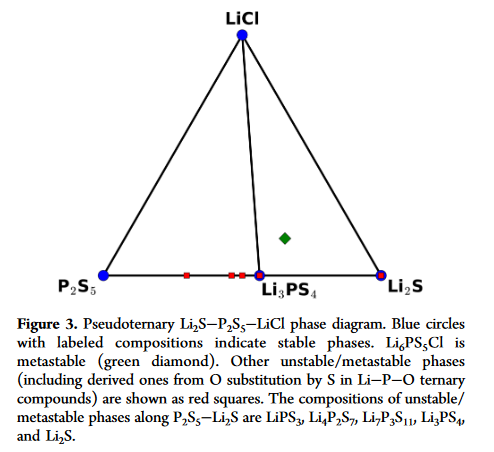

"""

From the phase diagram, one may compute the energy above hull ($E_{\rm hull}$) of $\rm Li_6PS_5Cl$. The$E_{\rm hull}$ of a phase is defined as the normalized energy per atom for that phase above the linear combination of stable equilibrium phases at that composition in the phase diagram (see below for slightly more explanations). A stable compound has $E_{\rm hull} = 0$, and the higher the $E_{\rm hull}$, the more unstable the compound is likely to be. The calculated $E_{\rm hull}$ of $\rm Li_6 PS_5 Cl$ is 21 meV/atom, indicating that it is [metastable](https://en.wikipedia.org/wiki/Metastability#Condensed_matter_and_macromolecules) with respect to a linear combination of $\rm Li_3PS_4$, $\rm Li_2 S$  and $\rm LiCl$ at 0 K. 

"""

The ***energy above the Phase Diagram's [convex hull](https://en.wikipedia.org/wiki/Convex_hull)*** ($E_{\rm hull}$) is a concept related to thermodynamic stability of phases.

I found some basic conceptual explanations [here](https://github.com/qzhu2017/CMS/wiki/Convex-hull-and-compositional-phase-diagram). Of potential interest: [this paper](https://arxiv.org/pdf/1806.01038.pdf) aim to predict $E_{\rm hull}$ using ML (more specifically comparing SVM, decision trees and NN).

Here, since we used DFT calculations to produce the `PhaseDiagram`, we can simply call its `get_e_above_hull` method to evaluate the $E_{\rm hull}$.

In [ ]:
print(f"The energy above hull for {entry.name} is {pd.get_e_above_hull(entry)} eV/atom.")

The energy above hull for Li6PS5Cl is 0.029154361538461515 eV/atom.


In their notebook, they only get the following, using the deprecated `PDAnalazer`:
```
analyzer = PDAnalyzer(pd)
ehull = analyzer.get_e_above_hull(entry)
>>> The energy above hull of Li6PS5Cl is 0.021 eV/atom.
```

Question?:

Where does the 38% difference come from?

In [ ]:
for ind_entry in entries:
    print(f"The energy above hull for {ind_entry.name} is {pd.get_e_above_hull(ind_entry)} eV/atom.")

The energy above hull for Li6PS5Cl is 0.029154361538461515 eV/atom.
The energy above hull for Cl2 is 0 eV/atom.
The energy above hull for Cl2 is 0.0 eV/atom.
The energy above hull for Cl2 is 0.0 eV/atom.
The energy above hull for LiCl is 0.020478605000000094 eV/atom.
The energy above hull for LiCl is 0 eV/atom.
The energy above hull for Li5P(S2Cl)2 is 0.018935586458333376 eV/atom.
The energy above hull for Li6PS5Cl is 0.08595150057692269 eV/atom.
The energy above hull for PCl3 is 0 eV/atom.
The energy above hull for PCl5 is 0.00553960708333312 eV/atom.
The energy above hull for PCl5 is 0 eV/atom.
The energy above hull for SCl4 is 0 eV/atom.
The energy above hull for SCl is 0 eV/atom.
The energy above hull for S3Cl is 0.35858966218750066 eV/atom.
The energy above hull for SCl2 is 0.0533625811458327 eV/atom.
The energy above hull for Li is 0.002524183333333374 eV/atom.
The energy above hull for Li is 0 eV/atom.
The energy above hull for Li is 0.010352237083333327 eV/atom.
The energy abov

Question?:

Why do I get duplicates with different energies? And (again) why are the 2 energies for Li6PS5Cl different (from one another and the ?



### Electrochemical Stability

"""

Another crucial property of an ASIC (Alkali Superionic Conductor) is its electrochemical stability against the electrodes. This stability can be achieved either intrinsically, i.e., the ASIC being completely inert against both the anode and cathode, or more realistically, via the formation of passivating layers. The phase equilibria at the ASIC/electrode interface may be estimated using a grand potential phase diagram construction. 

``` 
For more info: 
- Kamaya, N.; Homma, K.; Yamakawa, Y.; Hirayama, M.; Kanno, R.; Yonemura, M.; Kamiyama, T.; Kato, Y.; Hama, S.; Kawamoto, K.; Mitsui, A. A lithium superionic conductor. Nat. Mater. 2011, 10, 682− 686. 
- Ong, S. P.; Mo, Y.; Richards, W. D.; Miara, L.; Lee, H. S.; Ceder, G. Phase stability, electrochemical stability and ionic conductivity of the Li 10±1 MP 2 X 12 (M = Ge, Si, Sn, Al or P, and X = O, S or Se) family of superionic conductors. Energy Environ. Sci. 2013, 6, 148−156. *
```

The ASIC is subjected to a maximum range of electrochemical potential when the battery is in a fully charged state (see Figure 2 (below)).

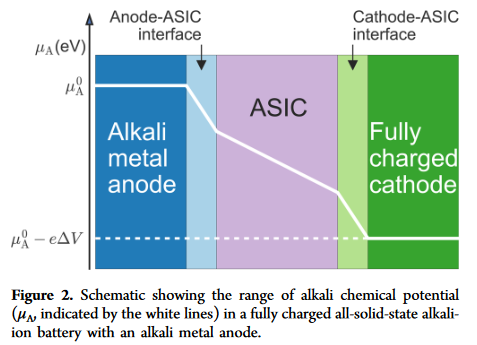


Under such conditions, the alkali-depleted cathode is effectively an alkali sink at low alkali chemical potential, while the anode is effectively an alkali source with high alkali chemical potential typically close to that of the bulk alkali metal. Assuming that the alkali ion is the main mobile specie, the ASIC/anode and ASIC/cathode interfaces can be approximated as open systems at $\mu_A = \mu_A^0$ and $\mu_A = \mu_A^0 − e\Delta V$, respectively. Here, $\mu_A^0$ is the chemical potential of the bulk alkali metal, $e$ is the elementary charge, and $\Delta V$ refers to the voltage of the charged cathode versus $A/A^+$ (*cf.  Aydinol et al. (1997). Ab initio study of lithium intercalation in metal oxides and metal
dichalcogenides.*). The relevant thermodynamic potential at 0 K is therefore the alkali grand potential, given by the following expression: 

$$ \phi =E - \mu_A N_A,$$

where $E$ is approximated as the computed DFT energy, $N_A$ is the number of alkali atoms for a particular phase, and the $PV$ term for solids is ignored. Using a similar phase diagram construction with $\phi$ instead of $E$, one can examine how the predicted phase equilibria at the ASIC composition changes with alkali chemical potential.

"""

"The electrochemical stability can be assessed using a similar phase diagram approach, but using the lithium grand potential instead of the internal energy.

First, we need to identify a reference for lithium chemical potential using the bulk Li energy $\mu_{\rm Li}^0$."

In [ ]:
li_entries = [e for e in entries if e.composition.reduced_formula == "Li"]
uli0 = min(li_entries, key=lambda e: e.energy_per_atom).energy_per_atom
uli0

-1.9089228533333333

The `PhaseDiagram` class provides a quick way to plot the phase diagram at a particular composition (e.g. $\rm Li_6PS_5Cl$) as a function of lithium chemical potential called thanks to `get_element_profile`.

From docs: "Provides the element evolution data for a composition. For example, can be used to analyze Li conversion voltages by varying uLi and looking at the phases formed. Also can be used to analyze O2 evolution by varying uO2."

Parameters:

    element – An element. Must be in the phase diagram.

    comp – A Composition

    comp_tol – The tolerance to use when calculating decompositions. Phases with amounts less than this tolerance are excluded. Defaults to 1e-5.

Returns: Evolution data as a list of dictionaries of the following format

    [ {‘chempot’: -10.487582010000001, ‘evolution’: -2.0, ‘reaction’: Reaction Object], …]


In [ ]:
entry.composition

Comp: Li12 P12 S36

In [ ]:
el_profile = pd.get_element_profile(Element("Li"), entry.composition)
 
print(f'Found {len(el_profile)} evolution data dict with keys={el_profile[0].keys()}')

Found 10 evolution data dict with keys=dict_keys(['chempot', 'evolution', 'element_reference', 'reaction', 'entries'])


In [ ]:
for i, d in enumerate(el_profile):
    voltage = -(d["chempot"] - uli0)
    print("Voltage: %s V" % voltage)
    print(d["reaction"])
    print("")

Voltage: -0.0 V
4 Li6PS5Cl + 32 Li -> 4 Li3P + 4 LiCl + 20 Li2S

Voltage: 0.8697028629166668 V
4 Li6PS5Cl + 24 Li -> 4 LiP + 4 LiCl + 20 Li2S

Voltage: 0.9324093885416653 V
4 Li6PS5Cl + 21.71 Li -> 0.5714 Li3P7 + 4 LiCl + 20 Li2S

Voltage: 1.1619996604166705 V
4 Li6PS5Cl + 20.57 Li -> 0.5714 LiP7 + 4 LiCl + 20 Li2S

Voltage: 1.2717621691666654 V
4 Li6PS5Cl + 20 Li -> 4 LiCl + 20 Li2S + 4 P

Voltage: 1.7076498754523812 V
4 Li6PS5Cl -> 4 Li3PS4 + 4 LiCl + 4 Li2S

Voltage: 2.1291348952380966 V
4 Li6PS5Cl -> 4 Li3PS4 + LiS4 + 4 LiCl + 7 Li

Voltage: 2.368810398840578 V
4 Li6PS5Cl -> 1.5 LiS4 + 4 LiCl + 2 P2S7 + 18.5 Li

Voltage: 2.886446450666666 V
4 Li6PS5Cl -> 0.5 LiS4 + 2 P2S7 + 4 SCl + 23.5 Li

Voltage: 3.7828703591666626 V
4 Li6PS5Cl -> 2 P2S7 + 2 S + 4 SCl + 24 Li



This element profile can be plotted as a Li evolution versus voltage using matplotlib as follows.

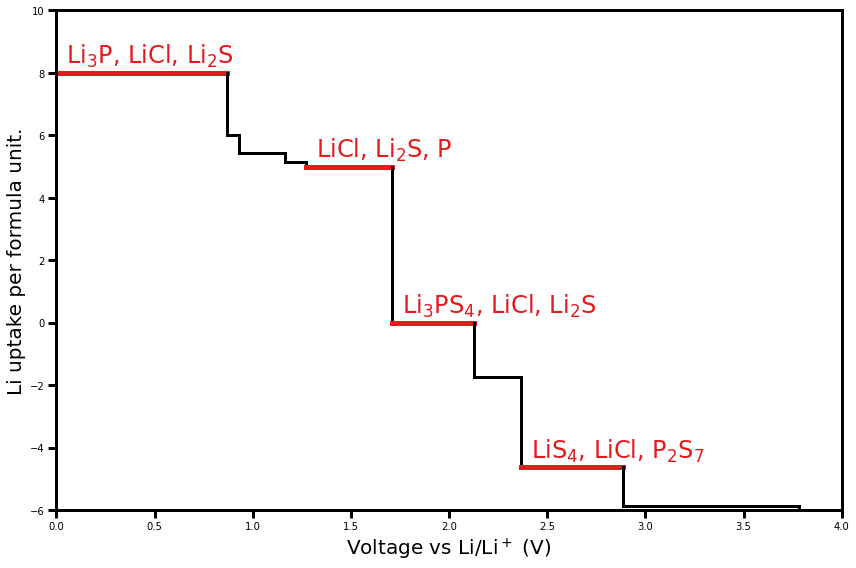

In [ ]:
# Some matplotlib settings to improve the look of the plot.
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=4
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['lines.markersize']=15
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4
mpl.rcParams["figure.figsize"] = (12, 8)

# Plot of Li uptake per formula unit (f.u.) of Li6PS5Cl against voltage vs Li/Li+.

colors = palettable.colorbrewer.qualitative.Set1_9.mpl_colors

import matplotlib.pyplot as plt

for i, d in enumerate(el_profile):
    v = - (d["chempot"] - uli0)
    if i != 0:
        plt.plot([x2, x2], [y1, d["evolution"] / 4.0], 'k', linewidth=3)
    x1 = v
    y1 = d["evolution"] / 4.0
    if i != len(el_profile) - 1:
        x2 = - (el_profile[i + 1]["chempot"] - uli0)
    else:
        x2 = 5.0
        
    if i in [0, 4, 5, 7]:
        products = [re.sub(r"(\d+)", r"$_{\1}$", p.reduced_formula)                     
                    for p in d["reaction"].products if p.reduced_formula != "Li"]

        plt.annotate(", ".join(products), xy=(v + 0.05, y1 + 0.3), 
                     fontsize=24, color=colors[0])
        
        plt.plot([x1, x2], [y1, y1], color=colors[0], linewidth=5)
    else:
        plt.plot([x1, x2], [y1, y1], 'k', linewidth=3)  

plt.xlim((0, 4.0))
plt.ylim((-6, 10))
plt.xlabel("Voltage vs Li/Li$^+$ (V)", fontsize=20)
plt.ylabel("Li uptake per formula unit.", fontsize=20)
plt.tight_layout()

The paper's figure description reads: "Plot of Li uptake per formula unit (f.u.) of $\rm Li_6PS_5Cl$ solid electrolyte (black solid) against voltage vs $\rm Li/Li^+$. At low voltage (high Li chemical potential), $\rm Li_6PS_5Cl$ undergoes reduction and uptakes Li, whereas at high voltage (low Li chemical potential), $\rm Li_6PS_5Cl$ is oxidized and loses Li. Text indicates the predicted phase equilibria at corresponding regions of the profile. Only selected regions are annotated for brevity."

<br>

*The text continues:*

"""

The plot clearly illustrates one of the major issues with sulfide-based ASICs, the narrow range of intrinsic electrochemical stability. The $\rm Li_6PS_5Cl$ composition is stable against Li uptake and loss only within a narrow range of voltage (1.7−2.3 V). Nevertheless, we find that electronically insulating, ionically conducting phases (e.g., $\rm Li_2S$, $\rm LiCl$) are formed at both higher and lower voltages, which may potentially serve as good passivating interfacial phases that act as a barrier against further ASIC decomposition. 

"""



## 3) Diffusivity and Ionic Conductivity

"""

An ASIC, as its name implies, must have a high alkali ionic conductivity. There are several first-principles approaches to the study of diffusivity and conductivity in materials. The most commonly used approaches are based on transition state methods such as nudged elastic band (NEB) calculations. Though NEB calculations are a powerful tool to extract alkali migration barriers, such calculations require prior knowledge of the diffusion pathway and are typically performed only at the dilute limits for single vacancy or alkali hops. Modeling ASICs, which have nondilute alkali concentration, with single hops at the dilute limits is usually a poor approximation.


A more realistic approach to studying alkali conductivity in ASICs is ab initio molecular dynamics (AIMD) simulations. Though highly computationally expensive, recent computing and methodological advances have rendered AIMD simulations within the reach of modest supercomputing clusters. Furthermore, the expected fast alkali diffusion in ASICs make it more likely that converged diffusion statistics can be obtained with relatively short simulation timeframes compared to slow diffusers. 


From an AIMD simulation, the diffusivity $D$ can be extracted via the following relation:


$$ D = \frac{1}{2dt} \langle [\Delta \mathbf{r}(t)]^2\rangle $$

where $d$ is the dimensionality factor (3 for 3D crystals), $\langle [\Delta \mathbf{r}(t)]^2\rangle$ is the average mean square displacement over a time $t$. The diffusivity is usually obtained by performing a linear fitting of the MSD
versus $2dt$

Under the assumption of no phase transitions and an
abundance of mobile defect carriers, the diffusivity in a solid generally follows an Arrhenius relationship:

$$ D = D_0 \exp \left( -\frac{E_a}{kT}\right) $$

where $D_0$ is the maximum diffusity at temperature $T=\infty$, $E_a$ is the activation energy, and k is the Boltzmann constant. To obtain room temperature diffusivity and activation energy, AIMD simulations are performed at multiple temperatures, and an Arrhenius plot of the log of the diffusivity versus 1/T is constructed. The alkali ionic conductivity at room temperature $\sigma_{300\rm K}$ can then be derived from the Nernst−Einstein equation as follows: 

$$ \sigma_{300\rm K} = \frac{\rho z^2 F^2}{RT} D_{300\rm K}$$

where $\rho$ is the molar density of diffusing alkali ions in the unit cell, $z$ is the charge of alkali ions (+1), and $F$ and $R$ are the Faraday’s constant and the gas constant, respectively.

"""

In [ ]:
import matplotlib.pyplot as plt
import json
import collections
from pymatgen.core import Structure
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer, \
    get_arrhenius_plot, get_extrapolated_conductivity

### Preprocessing


The `DiffusionAnalyzer` class in pymatgen can be instantiated from a supplied list of sequential vasprun.xml output files from the AIMD simulations. An example code (commented out) is shown below.

In [ ]:
# files = ["run1/vasprun.xml", "run2/vasprun.xml", "run3/vasprun.xml"]
# analyzer = DiffusionAnalyzer.from_files(files, specie="Li", smoothed=False)

In this work, all trajectories are stored in an efficient document-based MongoDB database. The format of the documents in the database is a binary JSON format. Here, we will instead instantiate the `DiffusionAnalyzer` from a pre-serialized `DiffusionAnalyzer` for each temperature.

In [ ]:
temperatures = [600, 800, 1000, 1200]
analyzers = collections.OrderedDict()
for temp in temperatures:
    with open(f'diffusion_T{temp}.json') as f:
        d = json.load(f)
        analyzers[temp] = DiffusionAnalyzer.from_dict(d)

### Mean Squared Displacement (MSD $ =\langle [\Delta \mathbf{r}(t)]^2\rangle$ ) vs time plot

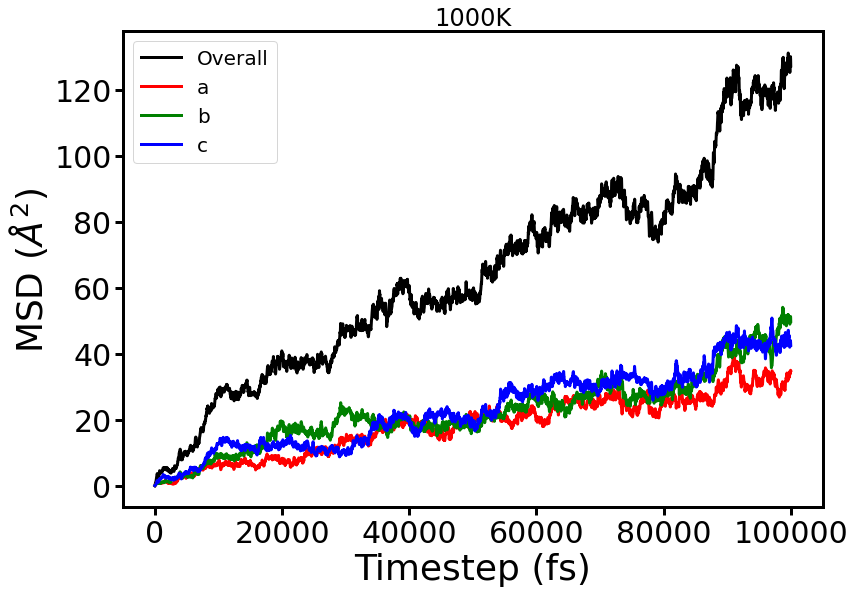

In [ ]:
plt = analyzers[1000].get_msd_plot()
title = plt.title("1000K", fontsize=24)

### Activation energy and ionic conductivity

From diffusivity at each temperature, we can obtain activation energy and room temperature ionic conductivity by constructing an Arrhenius plot. 

/usr/local/lib/python3.7/dist-packages/pymatgen/analysis/diffusion_analyzer.py:925: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/usr/local/lib/python3.7/dist-packages/pymatgen/analysis/diffusion_analyzer.py:932: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



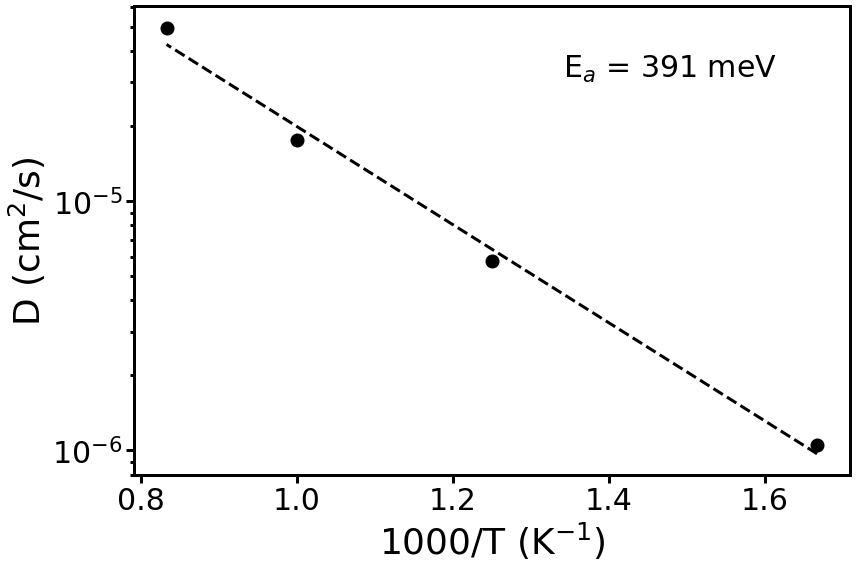

In [ ]:
diffusivities = [d.diffusivity for d in analyzers.values()]

plt = get_arrhenius_plot(temperatures, diffusivities)

But recall that "the experimentally reported crystal structure has formula $\rm Li_{6.72}PS_5Cl$, i.e., excess of Li. To more accurately model the reported phase, we performed similar analyses on a $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$ cell, which was constructed by introducing a single $\rm Li^+$ excess into the ordered stoichiometric $\rm Li_6PS_5Cl$ conventional cell with a $\rm Cl^−$ substituted by a $\rm S^{2−}$ to ensure overall charge neutrality. The Li excess $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$ structure is only slightly less stable ($E_{\rm hull} = 27$ meV/atom) than the stoichiometric $\rm Li_6PS_5Cl$ at 0 K (21 meV/atom).

In terms of transport properties, Li excess $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$  exhibits a much higher room temperature ionic conductivity of 14 mS/cm and a much lower activation energy of 211 meV."

I don't think we have the input files to reproduce $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$ data like we do for $\rm Li_6PS_5Cl$ below, but here's the paper's figure:


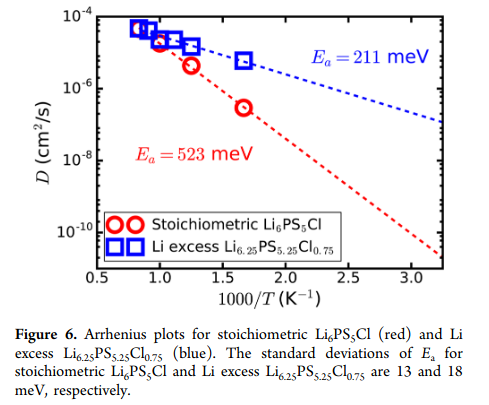

From the temperatures and diffusivities, one may obtained the extrapolated room-temperature conductivity as follows.

In [ ]:
rts = get_extrapolated_conductivity(
        temperatures, 
        diffusivities, 
        new_temp=300, 
        structure=analyzers[800].structure, 
        species="Li"
)
print("The Li ionic conductivity for Li6PS5Cl at 300 K is %.4f mS/cm" % rts)

The Li ionic conductivity for Li6PS5Cl at 300 K is 0.0730 mS/cm


We should get $\sigma_{300K} = 2 \times 10^{-3}$ mS/cm for stoichiometric $\rm Li_6PS_5Cl$ versus $\sigma_{300K} = 14$ mS/cm for $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$! 

QUESTION?: But the cell above disagrees with those values, apparently, although their notebook also return this 0.073 mS/cm... What's up with that???


But the authors caution: "The predicted room-temperature ionic conductivity is about 1 order of magnitude higher than previously measured total conductivities for this ASIC. The predicted activation energy is in reasonable agreement with the experimentally reported values, though it should be noted that reported experimental values vary widely due to variations in the synthesis conditions and compositions."

### Probability density function

Additional insights may be obtained by analyzing the trajectories from the AIMD simulations. A plot of the probability density function $P(r)$ can provide useful information on the low energy (high probability) sites in an ASIC, as well as the migration pathways between them. $P$ is often defined in a spatial 3D uniform grid and can be computed by averaging the number of the alkali ions at each grid point within a given time scale. $P$ is normalized such that $\int_\Omega P dV = 1$, with $\Omega$ being the volume of the unit cell.


Sadly, the add-on package in which both the probability density and van Hove function analyses (next section) are already implemented is deprecated and equivalent functions were not found elsewhere, so the code is left commented for now.

In [ ]:
# ! pip install pymatgen-diffusion

In [ ]:
# from pymatgen_diffusion.aimd.pathway import ProbabilityDensityAnalysis

In [ ]:
#structure = analyzers[800].structure
#trajectories = [s.frac_coords for s in analyzers[800].get_drift_corrected_structures()]
#pda = ProbabilityDensityAnalysis(structure, trajectories, species="Li")
#pda.to_chgcar("CHGCAR.vasp") # Output to a CHGCAR-like file for visualization in VESTA.structure = analyzers[800].structure
#trajectories = [s.frac_coords for s in analyzers[800].get_drift_corrected_structures()]
#pda = ProbabilityDensityAnalysis(structure, trajectories, species="Li")
#pda.to_chgcar("CHGCAR.vasp") # Output to a CHGCAR-like file for visualization in VESTA.



The VESTA visualization software can be used to visualize isosurfaces in the probability density. The 800K probability density function at an isosurface of 0.002 is shown below.


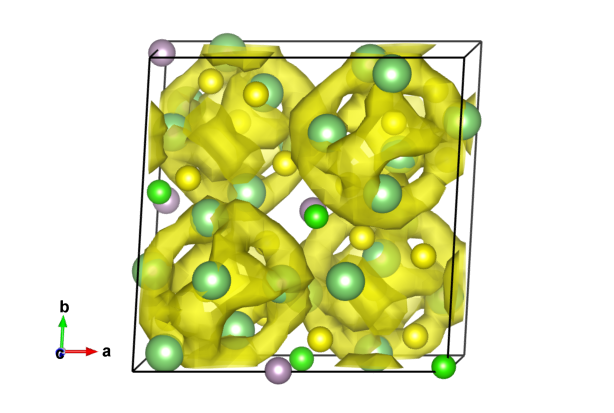

In [ ]:
from IPython.display import Image
Image(filename='Isosurface_800K_0.png') 

In the paper, they go into more details:

"Figure 7 (below) shows the Li + probability density function (PDF) for Li excess $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$ at 800 K at various isovalues. We may observe from the PDF at higher isovalue (Figure 7a) that Li + tends to move in a cage-like environment around each S 4d site, forming distorted $\rm Li_6S$ octahedrons. These results are similar to those reported in a previous study using bond valence methods. Because the cage-like trajectory is localized around a particular S site, this type of migration does not contribute to long-range ionic diffusion. Long-range diffusion happens due to migration between different cages, which can be observed at lower isovalues (Figure 7b). 

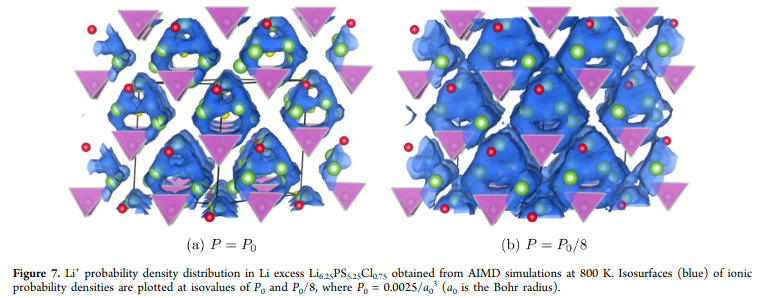

### van Hove correlation function analysis





Many ASICs also exhibit correlated or cooperative alkali motion, which can be analyzed by computing the van Hove correlation function. The van Hove correlation can be split into the self-part $G_s$ and the distinct-part $G_d$ as follows: 

$$ G_s(r, t) = \frac{1}{4\pi r^2 N_d} \langle \sum_{i=1}^{N_d} \delta(r - | \mathbf{r}_i(t_0) - \mathbf{r}_i(t+t_0) | \rangle_{t_0} $$

$$ G_d(r, t) = \frac{1}{4\pi r^2 \rho N_d} \langle \sum_{i\neq j}^{N_d} \delta(r - | \mathbf{r}_i(t_0) - \mathbf{r}_j(t+t_0) | \rangle_{t_0} $$,

where $\delta(\cdot)$ is the 1D Dirac delta function, $\mathbf{r}_i(t)$ is the position of the $i^{th}$ particle at time $t$, $N_d$ is the number of diffusing akali ions in the unit cell, $\rho$ is the average number density (serving as a normalizing factor s.t. $G_d \rightarrow 1$ when $r \gg 1$ ), and $r$ is the radial distance.

Intuitively, $G_s(r, t)$ describes how probable a particle diffuses away from its initial position by a distance of r after time t, whereas $G_d(r, t)$ describes the radial distribution of $N − 1 $ particles after time $t$ with respect to the initial reference particle. In particular, $G_d(r, t)$ is reduced to the static pair distribution function when $t = 0$, which is often used to investigate the dynamics of structural changes.


Sadly, the add-on package in which both the probability density (previous section) and van Hove function analyses are already implemented is deprecated and equivalent functions were not found elsewhere, so the code is left commented for now.

In [ ]:
# ! pip install pymatgen-diffusion

In [ ]:
# from pymatgen_diffusion.aimd.van_hove import VanHoveAnalysis

In [ ]:
# vha = VanHoveAnalysis(analyzers[800])  

# vha.get_gs_plots()
# vha.get_gd_plots()

The upper two plots in Figure 8 (below) show the $G_s$ for stoichiometric $\rm Li_6PS_5Cl$ and Li excess $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$, respectively. We observe that there is a persistent peak in $G_s$ between 3.5 and 4.5 Å, which corresponds to the nearest Li−Li distances within the same cage, in both cases. However, this cage-related peak decays much more rapidly in the case of Li excess $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$ compared to stoichiometric $\rm Li_6PS_5Cl$ and additional peaks at larger $r$ values appear after ∼30 ps. From the $G_d$ plots (lower plots in Figure 8), we find that there is a high probability of a vacated Li site being rapidly occupied by another Li+, though the time scale of these events is much shorter in the case of $\rm Li_{6.25}PS_{5.25}Cl_{0.75}$, which is consistent with the faster diffusion observed in the Li excess material.

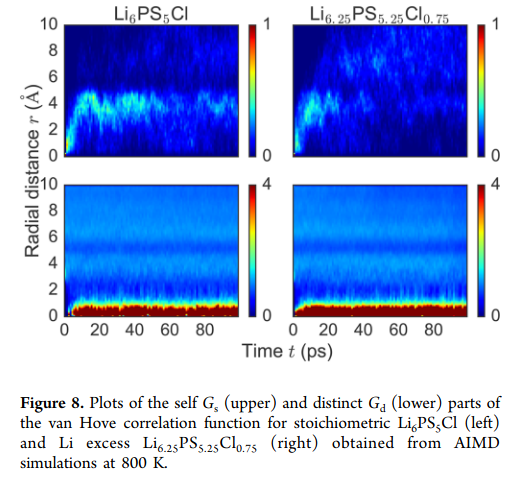

#### Practical Considerations
"""

Most AIMD simulations of ASICs are often performed in NVT ensemble with a Nosé - Hoover thermostat. The cell parameters are typically fixed at the 0 K values obtained from DFT structural optimization or at the experimentally reported values. Though this is certainly an approximation in the model, previous studies have found that the resulting diffusivities and conductivities obtained are usually in reasonable agreement with experimental values. The choice of the NVT over the NpT ensemble is motivated by the lower computation cost (lower energy cutoff), as well as the fact that simulations can be performed at elevated temperatures to obtain diffusion statistics without melting. Further computational cost savings can be achieved by performing nonspin-polarized calculations with a lower plane-wave energy cutoff and a small k-point mesh. A time step of 2 fs is typically sufficient for simulations of ASIC materials. It should be noted that MD simulations should ideally be performed on large supercells to avoid introducing artificial correlated diffusivity due to periodic boundary conditions. Due to the high cost of AIMD methods, only moderate cell sizes of at least 10 Å in each lattice direction are typically used. Nevertheless, useful statistics and data can usually be obtained even within these limitations. 

There are two practical challenges in AIMD simulations. First, most AIMD simulations require multiweek calculations well beyond the wall times of typical supercomputing clusters, and runs have to be performed at multiple temperatures. The traditional approach of performing AIMD simulations therefore requires significant human intervention, with a high likelihood of errors. To address this challenge, we have developed an automated AIMD workflow using FireWorks, a workflow management software. Figure 5 shows the schematic of a typical AIMD workflow. The crystal structure is first relaxed to an optimized geometry, from which a sufficiently large simulation supercell box is created. Then, AIMD jobs with different targeting temperatures are dynamically added to the workflow. Each AIMD job is running with a WallTimeHandler implemented in Custodian library, 50 which terminates the job gracefully just prior to the wall time limit. A continuation job is then resubmitted until a predefined set of convergence criteria (e.g., a maximum number of time steps, a required MSD, a required R-squared for the MSD vs 2dt linear fitting, etc.) is reached. Using this workflow, AIMD simulations can be performed with minimal human intervention except for an initial workflow and structure setup. Second, compared to other first-principles methods, the sheer quantity of data (e.g., trajectories) generated in AIMD simulations is considerable. Though MSD and other analyses can be performed directly from the raw outputs of the calculations, a more modern approach is to use state-of-the-art databases for data management. In this work, we use MongoDB, a NoSQL database to store the trajectories and analyses from AIMD simulations. Each MD snapshot, together with identifying information and the time step number, is stored as a single document within a collection. This storage scheme allows one to efficiently query for subsets of snapshots (e.g., every 10 or 100 time steps) for analysis. The results of all analyses (e.g., calculated diffusivities, conductivities, activation barriers, etc.) are stored in a separate collection for easy retrieval. Samples of BSON (Binary Javascript Object Notation) dumps of the MongoDB documents for 100 trajectories and the analysis of Li 6PS 5 Cl are given in Text File 1 (renamed bson_dumps_for_100_trajectories.txt) and Text File 2 (renamed bson_dump_for_Li6PS5Cl_analysis.txt), respectively. 

"""

### Discussion

Not a lot of new info, more like the summary of the analyses. Again, the paper (without code) can be [read here](https://materialsvirtuallab.org/pubs/10.1021_acs.chemmater.6b02648.pdf).

# Machine Learning-driven discovery of ASIC 



Sendek et al. (2019) identified 5 predictive features for logistic model of the superionic conductivity of Li-based crystals:

- LLB: average number of Li-Li bonds (nb of Li neighbhors) per Li
- SBI: average sublattice bond ionicity
- AFC: average coordination of the anions in the anion framework
- LASD: average equilibrium Li-anion separation distance (in Å)
- LLSD: average equilibirum Li-Li separation distance (in Å)

In [ ]:
import os
import numpy as np
import pandas as pd
import json 
import copy
from pymatgen.io.cif import CifParser, CifWriter
from pymatgen.core.composition import Composition
from pymatgen.core import Element, Structure, IStructure
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.bond_valence import BVAnalyzer

with open('./pmg_api_key.json', 'r') as infile:
    api_key = json.load(infile)['PMG_MAPI_KEY'] 

In [ ]:
 class Sendek_Logistic_Model:
    def __init__(self, 
                 input_formula, 
                 compute_features=False, 
                 conducting_ion='Li'):
        # Basic structual components for this compound
        self.conducting_ion = Element(conducting_ion)
        self.input_formula = input_formula

        # "input_formula" can already be Structure but if not, read it from files/MP 
        self.structure = self.read_structure() if type(input_formula) != Structure else input_formula
        self.disordered_sites = self.get_disordered_sites()
        self.is_ordered = len(self.disordered_sites) == 0
        # Create a 3x3x3 cell to account for periodicity
        self.supercell = self.make_3x3x3_supercell()
        self.prim_cell = SpacegroupAnalyzer(self.structure).find_primitive()
        
        # Comp = computational, aka "unit cell" in the paper, but I find it 
        # slightly confusing with the primitive cell. See get_central_cell()
        # method for more detail on the indexing of comp_cell_sites
        self.comp_cell_sites = [self.supercell[i] 
                                for i in range(13, len(self.supercell), 3**3)]
        self.comp_cell = self.get_central_cell()  
        self.comp_cell_li_sites = [site for site in self.comp_cell_sites 
                                        if site.specie == self.conducting_ion]
            
        if compute_features:
            self.llb = round(self.compute_llb(), 3)
            self.sbi = round(self.compute_sbi(), 3)
            self.afc = round(self.compute_afc(), 3)
            self.lasd = round(self.compute_lasd(), 3)
            self.llsd = round(self.compute_llsd(), 3)
            self.features = np.array([self.llb, self.sbi, self.afc, self.lasd, 
                                    self.llsd])
            print(f'Features computed for {self.input_formula}')
            self.sic_prob = round(self.sendek_fitted_model(), 3)

    def get_MP_presets(self):
        return {
            'LiNH2': 'mp-1079418',
            'LiAlSiO4': 'mp-6326',
            'Li14Ge2V2O16': 'mp-849771',
            'Li10Ge(PS6)2': 'mp-696128'
        }

    def read_structure(self):
        # Attempt to read from an external CIF file first
        fname = f'./data/{self.input_formula}.cif'
        if os.path.exists(fname):
            cif = CifParser(
                    fname, 
                    occupancy_tolerance=2,  # def = 1
                    site_tolerance=10e-5  # def = 10-4
            )
            structures = cif.get_structures()
            assert len(structures) == 1
            disordered_sites = [site for site in structures[0] if site.is_ordered is False]
            is_ordered = len(disordered_sites) == 0
            if not is_ordered:
                print(f'Structure from {fname} is disordered. Trying MP instead.')
                return self._read_structure_from_MP()
            else:
                self.structure_source = 'external_cif' 
                print(f'Structure from {fname} is ordered. Using as is.')
                return structures[0]
        else:
            print(f'Could not find {fname}. Trying MP.')
            return self._read_structure_from_MP()
            
            
    def _read_structure_from_MP(self):
        MP_presets = self.get_MP_presets()
        formula = self.input_formula
        with MPRester(api_key) as mpr:
            # Check if formula is in a preset list of pm-id, otherwise default 
            # to the first found (if any)
            if formula in MP_presets.keys():
                mp_id = MP_presets[formula]
                print(f'Using preset {mp_id} for {formula}')
                self.structure_source = 'mp'
                return mpr.get_structure_by_material_id(mp_id)
                
            else:
                structures = mpr.get_structures(formula)
                if len(structures) > 0:
                    print(f'Using 1st out of {len(structures)} MP structures' 
                          f'for {formula}.')
                    self.structure_source = 'mp'
                    return structures[0]
                else:
                    print('No structure find in MP!')
                    # Overwrite the structure_source since we didn't find any
                    self.structure_source = None
                    self.is_ordered = None
                    return


    def get_disordered_sites(self):
        return [site for site in self.structure if site.is_ordered is False]


    def sendek_fitted_model(self):
        # Insert the bias term in the first index, followed by computed features
        features = np.insert(self.features, 0, 1)
        fitted_params = np.array([-6.564, 0.184, -4.009, -0.467, 8.699, -2.170])
        return np.reciprocal((1 + np.exp(-1 * np.dot(fitted_params, features))))


    def make_3x3x3_supercell(self):
        supercell = SpacegroupAnalyzer(self.structure).find_primitive()
        supercell.make_supercell([3, 3, 3])
        return supercell
    

    def get_central_cell(self):
      """
      Each atom from the primitive cell now has 3**3=27 copies in the supercell, 
      whose index gets "filled" sequentially starting with direction "c",
      then "b", then "a". So the atom with index 0 in the prim_cell with occupy
      index [0:27], index 1 will occupy [27:27+27], and so on.

      If you want to see the exact ordering, I suggest you "print" the supercell
      vs the primitive cell and draw the frame of reference on paper, but it's
      not very  important as, thankfully, most "natural" ordering would make the 
      central computational/init cell we're interested in to have index == 13.  
      This function makes another Structure by grabing every 27th atom from the 
      3x3x3 supercell, starting at index 13 (hence the `range` arguments in
      `self.comp_cell_sites` aboce)get_materials_ids
      """
      return Structure.from_sites(self.comp_cell_sites)
    

    def get_structure_anions(self, struct):
        try:
            bva = BVAnalyzer()
            # TODO: getting all anions in the supercell this way seems to be the 
            #       biggest bottleneck of the calculations. It might be worth 
            #       finding an alternative, especially since we only want the 
            #       closest anion in the supercell for each Li in the comp_cell
            struct_anions = [
                site
                for site in bva.get_oxi_state_decorated_structure(struct)  
                if str(site.specie)[-1] == '-'
            ]
        except ValueError as e :
            print('Using oxi_state_guesses for anions instead of BVAnalyzer.'
                 f'Exception={e}')
            oxi_states = Composition(self.input_formula).oxi_state_guesses()[0]
            anion_elements = [Element(element) 
                              for element, oxi_state in oxi_states.items() 
                              if oxi_state < 0]

            struct_anions = [site
                             for site in struct
                             if site.specie in anion_elements]

        return struct_anions


    def compute_llb(self):
        """
        LLB: avg nb of Li neighbors (:= <4Å in the supercell) per Li in the 
        computational cell.
        """
        
        nb_li_neighbors = 0
        for li in self.comp_cell_li_sites:
            nb_li_neighbors += len(
                [site
                 for site in self.supercell.get_neighbors(li, 4) 
                 if site.specie == self.conducting_ion]
            )
        return nb_li_neighbors / len(self.comp_cell_li_sites)
  

    def compute_sbi(self): 
        """
        SBI: average sublattice bond ionicity 

        Loop through all non-Li atoms (X) in the unit cell, and find all X-Y 
        bonds, where X and Y are separated by at most 4Å [in the supercell] and 
        X is not Li (but Y may be Li). Calculate the bond ionicity 
        I_i = |EN_Li -EN_X |1{r Li-X ≤4Å} with 𝑖 ∈ {𝐿𝑖 ‒ 𝑋} and 
        EN = Pauling Electronegativity of all N_bonds, and take the average.
        """

        total_bond_ionicity = 0
        total_num_bonds = 0

        non_li_comp_sites = [site 
                             for site in self.comp_cell 
                             if site.specie != self.conducting_ion]

        for non_li_site in non_li_comp_sites:
            neighbors = self.supercell.get_neighbors(non_li_site, 4)
            total_num_bonds += len(neighbors)
            for neighbor in neighbors:
                total_bond_ionicity += abs(non_li_site.specie.X - neighbor.specie.X)
        
        return total_bond_ionicity / total_num_bonds


    def compute_lasd(self): 
        """
        LASD: Average shortest Li_{comp_cell}-anion_{supercell} separation 
              distance (in Å) 

        For each of the Li atoms in the cell, find the distance r_ij to the
        nearest anion A in the supercell. Take the average of these values over 
        all N_Li atoms.
        """

        supercell_anions = self.get_structure_anions(self.supercell)

        min_li_anion_distances = []
        for li_site in self.comp_cell_li_sites:
            min_li_anion_distances.append(
                min([li_site.distance(anion) for anion in supercell_anions])
            ) 
              
        return np.average(min_li_anion_distances)


    def compute_llsd(self):  
        """
        LLSD: Avg shortest Li_{comp_cell}-Li_{supercell} separation distance (Å)       
        """

        min_li_li_distances = []
        for li_site in self.comp_cell_li_sites:
            # get all Li neighbors (in arbitrarly large radius) for this li_site
            # nb: site_from_structure.distance(neighbor) assumes periodic 
            # conditions, but we  want to ignore if a neighbor is a periodic 
            # repetition, so we use explicit formula for eucledian distance 
            # (otherwise the min would be 0)
            min_li_li_distances.append(
                min([
                  np.sqrt(np.sum(np.power((neighbor.coords-li_site.coords), 2)))
                  for neighbor in self.supercell.get_neighbors(li_site, 20) 
                  if neighbor.specie == self.conducting_ion
                ])
            ) 
        return np.average(min_li_li_distances)
    
    
    def compute_afc(self):
        """
        AFC: average coordination of the anions in the anion framework

        First, find the atom in the lattice with the highest Pauling 
        electronegativity value and designate this as the lattice anion, A. 
        Ignoring all other atoms in the lattice, calculate the coordination of 
        the anions with each other. This is done with the following procedure:
        for each anion in the lattice i, find the nearest anion j at a distance
        𝑟_𝑖𝑗_0. Then count the number of anions in the supercell within a 
        distance r_ij from atom i such that 𝑟 𝑖𝑗_0 ≤ 𝑟 𝑖𝑗 ≤ 𝑟 𝑖𝑗_0 + 1Å.
.       Average this over all anions in the unit cell.
        """
        # Create a Structure with only the anions
        supercell_anions = self.get_structure_anions(self.supercell)
        supercell_anions_struct = Structure.from_sites(supercell_anions)

        # Get the lattice anions (:= atoms with the max Electronegativity)
        max_electronegativity = max([site.specie.X for site in self.comp_cell])

        lattice_anions = [site 
                          for site in self.comp_cell 
                          if site.specie.X == max_electronegativity]

        # For each lattice anion, count the anions in the the supercell 
        # within 1 A of the closest (supercell) anion, then average
        anion_bonds_counter = 0
        for anion in lattice_anions:
            min_anion_dist = min(
                [np.sqrt(np.sum(np.power((neighbor.coords - anion.coords), 2)))
                 for neighbor in supercell_anions_struct.get_neighbors(anion, 10)
                 if (neighbor.coords - anion.coords).any()] 
            )       # arr.any() == False iif arr == (0, 0, 0), i.e. same coords
            for supercell_anion in supercell_anions:
                dist = np.sqrt(
                    np.sum(np.power((supercell_anion.coords - anion.coords), 2))
                )
                if min_anion_dist <= dist <= min_anion_dist + 1:
                    anion_bonds_counter += 1 
            
        return anion_bonds_counter / len(lattice_anions)

In [ ]:
 class Sendek_Logistic_Model_no_prim:
    def __init__(self, 
                 input_formula, 
                 compute_features=False, 
                 conducting_ion='Li'):
        # Basic structual components for this compound
        self.conducting_ion = Element(conducting_ion)
        self.input_formula = input_formula

        # "input_formula" can already be Structure but if not, read it from files/MP 
        self.structure = self.read_structure() if type(input_formula) != Structure else input_formula
        self.prim_cell = self.structure
        # Create a 3x3x3 cell to account for periodicity
        self.supercell = self.make_3x3x3_supercell()
        
        # Comp = computational, aka "unit cell" in the paper, but I find it 
        # slightly confusing with the primitive cell. See get_central_cell()
        # method for more detail on the indexing of comp_cell_sites
        self.comp_cell_sites = [self.supercell[i] 
                                for i in range(13, len(self.supercell), 3**3)]
        self.comp_cell = self.get_central_cell()  
        self.comp_cell_li_sites = [site for site in self.comp_cell_sites 
                                        if site.specie == self.conducting_ion]
            
        if compute_features:
            self.llb = round(self.compute_llb(), 3)
            self.sbi = round(self.compute_sbi(), 3)
            self.afc = round(self.compute_afc(), 3)
            self.lasd = round(self.compute_lasd(), 3)
            self.llsd = round(self.compute_llsd(), 3)
            self.features = np.array([self.llb, self.sbi, self.afc, self.lasd, 
                                    self.llsd])
            print(f'Features computed for {self.input_formula}')
            self.sic_prob = round(self.sendek_fitted_model(), 3)

    def get_MP_presets(self):
        return {
            'LiNH2': 'mp-1079418',
            'LiAlSiO4': 'mp-6326',
            'Li14Ge2V2O16': 'mp-849771',
            'Li10Ge(PS6)2': 'mp-696128'
        }

    def read_structure(self):
        # Attempt to read from an external CIF file first
        fname = f'./data/{self.input_formula}.cif'
        if os.path.exists(fname):
            cif = CifParser(
                    fname, 
                    occupancy_tolerance=2,  # def = 1
                    site_tolerance=10e-5  # def = 10-4
            )
            structures = cif.get_structures()
            assert len(structures) == 1
            self.is_disordered = self.check_if_disordered(structures[0])
            if self.is_disordered:
                print(f'Structure from {fname} is disordered. Trying MP instead.')
                return self._read_structure_from_MP()
            else:
                self.structure_source = 'external_cif' 
                print(f'Structure from {fname} is ordered. Using as is.')
                return structures[0]
        else:
            print(f'Could not find {fname}. Trying MP.')
            self.is_disordered = False
            return self._read_structure_from_MP()
            
            
    def _read_structure_from_MP(self):
        MP_presets = self.get_MP_presets()
        formula = self.input_formula
        with MPRester(api_key) as mpr:
            # Check if formula is in a preset list of pm-id, otherwise default 
            # to the first found (if any)
            if formula in MP_presets.keys():
                mp_id = MP_presets[formula]
                print(f'Using preset {mp_id} for {formula}')
                self.structure_source = 'mp'
                return mpr.get_structure_by_material_id(mp_id)
                
            else:
                structures = mpr.get_structures(formula)
                if len(structures) > 0:
                    print(f'Using 1st out of {len(structures)} MP structures' 
                          f'for {formula}.')
                    self.structure_source = 'mp'
                    return structures[0]
                else:
                    print('No structure find in MP!')
                    # Overwrite the structure_source since we didn't find any
                    self.structure_source = None
                    self.is_disordered = None
                    return


    def check_if_disordered(self, struct):
        # A structure is disordered if any site's occupency sums to <1 OR
        # if any site that sums == 1 has more than 1 element
        for site in struct:
            # site.species is a dict('element': occupency)
            if sum(site.species.values()) < 1: 
                return True
            elif len(site.species) > 1:
                return True
            else:
                continue
        return False


    def sendek_fitted_model(self):
        # Insert the bias term in the first index, followed by computed features
        features = np.insert(self.features, 0, 1)
        fitted_params = np.array([-6.564, 0.184, -4.009, -0.467, 8.699, -2.170])
        return np.reciprocal((1 + np.exp(-1 * np.dot(fitted_params, features))))


    def make_3x3x3_supercell(self):
        supercell = copy.deepcopy(self.structure)
        supercell.make_supercell([3, 3, 3])
        return supercell
    

    def get_central_cell(self):
      """
      Each atom from the primitive cell now has 3**3=27 copies in the supercell, 
      whose index gets "filled" sequentially starting with direction "c",
      then "b", then "a". So the atom with index 0 in the prim_cell with occupy
      index [0:27], index 1 will occupy [27:27+27], and so on.

      If you want to see the exact ordering, I suggest you "print" the supercell
      vs the primitive cell and draw the frame of reference on paper, but it's
      not very  important as, thankfully, most "natural" ordering would make the 
      central computational/init cell we're interested in to have index == 13.  
      This function makes another Structure by grabing every 27th atom from the 
      3x3x3 supercell, starting at index 13 (hence the `range` arguments in
      `self.comp_cell_sites` aboce)get_materials_ids
      """
      return Structure.from_sites(self.comp_cell_sites)
    

    def get_structure_anions(self, struct):
        try:
            bva = BVAnalyzer()
            # TODO: getting all anions in the supercell this way seems to be the 
            #       biggest bottleneck of the calculations. It might be worth 
            #       finding an alternative, especially since we only want the 
            #       closest anion in the supercell for each Li in the comp_cell
            struct_anions = [
                site
                for site in bva.get_oxi_state_decorated_structure(struct)  
                if str(site.specie)[-1] == '-'
            ]
        except ValueError as e :
            print('Using oxi_state_guesses for anions instead of BVAnalyzer.'
                 f'Exception={e}')
            oxi_states = Composition(self.input_formula).oxi_state_guesses()[0]
            anion_elements = [Element(element) 
                              for element, oxi_state in oxi_states.items() 
                              if oxi_state < 0]

            struct_anions = [site
                             for site in struct
                             if site.specie in anion_elements]

        return struct_anions


    def compute_llb(self):
        """
        LLB: avg nb of Li neighbors (:= <4Å in the supercell) per Li in the 
        computational cell.
        """
        
        nb_li_neighbors = 0
        for li in self.comp_cell_li_sites:
            nb_li_neighbors += len(
                [site
                 for site in self.supercell.get_neighbors(li, 4) 
                 if site.specie == self.conducting_ion]
            )
        return nb_li_neighbors / len(self.comp_cell_li_sites)
  

    def compute_sbi(self): 
        """
        SBI: average sublattice bond ionicity 

        Loop through all non-Li atoms (X) in the unit cell, and find all X-Y 
        bonds, where X and Y are separated by at most 4Å [in the supercell] and 
        X is not Li (but Y may be Li). Calculate the bond ionicity 
        I_i = |EN_Li -EN_X |1{r Li-X ≤4Å} with 𝑖 ∈ {𝐿𝑖 ‒ 𝑋} and 
        EN = Pauling Electronegativity of all N_bonds, and take the average.
        """

        total_bond_ionicity = 0
        total_num_bonds = 0

        non_li_comp_sites = [site 
                             for site in self.comp_cell 
                             if site.specie != self.conducting_ion]

        for non_li_site in non_li_comp_sites:
            neighbors = self.supercell.get_neighbors(non_li_site, 4)
            total_num_bonds += len(neighbors)
            for neighbor in neighbors:
                total_bond_ionicity += abs(non_li_site.specie.X - neighbor.specie.X)
        
        return total_bond_ionicity / total_num_bonds


    def compute_lasd(self): 
        """
        LASD: Average shortest Li_{comp_cell}-anion_{supercell} separation 
              distance (in Å) 

        For each of the Li atoms in the cell, find the distance r_ij to the
        nearest anion A in the supercell. Take the average of these values over 
        all N_Li atoms.
        """

        supercell_anions = self.get_structure_anions(self.supercell)

        min_li_anion_distances = []
        for li_site in self.comp_cell_li_sites:
            min_li_anion_distances.append(
                min([li_site.distance(anion) for anion in supercell_anions])
            ) 
              
        return np.average(min_li_anion_distances)


    def compute_llsd(self):  
        """
        LLSD: Avg shortest Li_{comp_cell}-Li_{supercell} separation distance (Å)       
        """

        min_li_li_distances = []
        for li_site in self.comp_cell_li_sites:
            # get all Li neighbors (in arbitrarly large radius) for this li_site
            # nb: site_from_structure.distance(neighbor) assumes periodic 
            # conditions, but we  want to ignore if a neighbor is a periodic 
            # repetition, so we use explicit formula for eucledian distance 
            # (otherwise the min would be 0)
            min_li_li_distances.append(
                min([
                  np.sqrt(np.sum(np.power((neighbor.coords-li_site.coords), 2)))
                  for neighbor in self.supercell.get_neighbors(li_site, 20) 
                  if neighbor.specie == self.conducting_ion
                ])
            ) 
        return np.average(min_li_li_distances)
    
    
    def compute_afc(self):
        """
        AFC: average coordination of the anions in the anion framework

        First, find the atom in the lattice with the highest Pauling 
        electronegativity value and designate this as the lattice anion, A. 
        Ignoring all other atoms in the lattice, calculate the coordination of 
        the anions with each other. This is done with the following procedure:
        for each anion in the lattice i, find the nearest anion j at a distance
        𝑟_𝑖𝑗_0. Then count the number of anions in the supercell within a 
        distance r_ij from atom i such that 𝑟 𝑖𝑗_0 ≤ 𝑟 𝑖𝑗 ≤ 𝑟 𝑖𝑗_0 + 1Å.
.       Average this over all anions in the unit cell.
        """
        # Create a Structure with only the anions
        supercell_anions = self.get_structure_anions(self.supercell)
        supercell_anions_struct = Structure.from_sites(supercell_anions)

        # Get the lattice anions (:= atoms with the max Electronegativity)
        max_electronegativity = max([site.specie.X for site in self.comp_cell])

        lattice_anions = [site 
                          for site in self.comp_cell 
                          if site.specie.X == max_electronegativity]

        # For each lattice anion, count the anions in the the supercell 
        # within 1 A of the closest (supercell) anion, then average
        anion_bonds_counter = 0
        for anion in lattice_anions:
            min_anion_dist = min(
                [np.sqrt(np.sum(np.power((neighbor.coords - anion.coords), 2)))
                 for neighbor in supercell_anions_struct.get_neighbors(anion, 10)
                 if (neighbor.coords - anion.coords).any()] 
            )       # arr.any() == False iif arr == (0, 0, 0), i.e. same coords
            for supercell_anion in supercell_anions:
                dist = np.sqrt(
                    np.sum(np.power((supercell_anion.coords - anion.coords), 2))
                )
                if min_anion_dist <= dist <= min_anion_dist + 1:
                    anion_bonds_counter += 1 
            
        return anion_bonds_counter / len(lattice_anions)

#### Reproducing Table S2 of Sendek et al. (2016)

In [ ]:
# LiSO3F
features = ['llb', 'sbi', 'afc', 'lasd', 'llsd']
expected_structures_feature = {
    'LiI': {'llb': 0, 'sbi': 1.68, 'afc': 12, 'lasd': 3.02, 'llsd': 4.26},
    'Li3P': {'llb': 11.33, 'sbi': 1.21, 'afc': 12, 'lasd': 2.5, 'llsd': 2.59}
}

for formula in expected_structures_feature.keys():
    
    model = Sendek_Logistic_Model_no_prim(formula, compute_features=True)
    
    print(f'############ Mine VS Expected for {formula} ############\n')
    print(f'llb: \t {model.llb} vs {expected_structures_feature[formula]["llb"]} '
          f'(diff = {model.llb - expected_structures_feature[formula]["llb"]})')
    
    print(f'lasd: \t {model.lasd} vs {expected_structures_feature[formula]["lasd"]} '
          f'(diff = {model.lasd - expected_structures_feature[formula]["lasd"]})')
        
    print(f'afc: \t {model.afc} vs {expected_structures_feature[formula]["afc"]} '
          f'(diff = {model.afc - expected_structures_feature[formula]["afc"]})')
    
    print(f'llsd: \t {model.llsd} vs {expected_structures_feature[formula]["llsd"]} '
          f'(diff = {model.llsd - expected_structures_feature[formula]["llsd"]})')
    
    print(f'sbi: \t {model.sbi} vs {expected_structures_feature[formula]["sbi"]} '
          f'(diff = {model.sbi - expected_structures_feature[formula]["sbi"]})\n')
    print('##################################################\n\n')

Structure from ./data/LiI.cif is ordered. Using as is.
Features computed for LiI
############ Mine VS Expected for LiI ############

llb: 	 0.0 vs 0 (diff = 0.0)
lasd: 	 3.013 vs 3.02 (diff = -0.007000000000000117)
afc: 	 12.0 vs 12 (diff = 0.0)
llsd: 	 4.261 vs 4.26 (diff = 0.001000000000000334)
sbi: 	 1.68 vs 1.68 (diff = 0.0)

##################################################


Structure from ./data/Li3P.cif is ordered. Using as is.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Features computed for Li3P
############ Mine VS Expected for Li3P ############

llb: 	 11.333 vs 11.33 (diff = 0.0030000000000001137)
lasd: 	 2.496 vs 2.5 (diff = -0.0040000000000000036)
afc: 	 12.0 vs 12 (diff = 0.0)
llsd: 	 2.589 vs 2.59 (diff = -0.0009999999999998899)
sbi: 	 1.21 vs 1.21 (diff = 0.0)

##################################################




#### Reproduce the fitted parameters by retraining on the training dataset

### OOPS !
- First, we need structures from ICSD (inorganic crystal structures database)...! 
- Even with formules for which there exists at least 1 structure in MP, the features might be highly inaccurate! (
  - E.g. if there are multiples (as it's **often** the case), I only took the first one, and there's no easy way to know if that's the right one
  - If there is only one, does it really correspond to the experimental data, or did the later synthesized a compound with a very different group symmetry?


#### About ICSD

- Independant initiative from Materials Project 
- No API available from `pymatgen`
- REST API documentation [here](https://icsd.fiz-karlsruhe.de/api/) (also [this repo](https://github.com/simonverret/materials_data_api_scripts/tree/master/materials_datasets/icsd) might be useful) & Web Interface [here](https://icsd.fiz-karlsruhe.de/index.xhtml) (already not the biggest fan...)
- But for now, only demo account with 3% for the data
- Complete access only seems available by writting to them, which I did this morning

So in the meantime...

#### Reproduce predicted $P(\sigma\ge10^{-4})$ for the 21 materials randomly sampled from the 317 candidates pre-screened by Sendek et al. (2019) (for which we know the output of the model).

In [ ]:
sendek_expected_outputs = {
    'LiSO3F': 1
}
with open('./pmg_api_key.json', 'r') as infile:
        api_key = json.load(infile)['PMG_MAPI_KEY'] 

total_absolute_error = 0
with MPRester(api_key) as mpr:
    for chemical_formula, expected_prob in sendek_expected_outputs.items():
        structures = mpr.get_structures(chemical_formula)
        print(f"### Results for {chemical_formula}'s {len(structures)} structures ###")
        for idx, structure in enumerate(structures):
            test_prob = Sendek_Logistic_Model_no_prim(structure, True).sic_prob
            diff = round(expected_prob - test_prob, 3)
            total_absolute_error += abs(diff)
            print(f"Expected Prob - Test Prob = {expected_prob} - {test_prob} = "
                  f"{diff} for structure idx={idx}.")
        print('\n')

print(f'total_absolute_error={total_absolute_error}')

### Results for LiSO3F's 1 structures ###
Features computed for Full Formula (Li2 S2 O6 F2)
Reduced Formula: LiSO3F
abc   :   5.772507   5.772507   5.307695
angles:  88.779087  88.779087  83.511512
Sites (12)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Li    0.192884  0.807116  0               -0
  1  Li    0.807116  0.192884  0               -0
  2  S     0.708062  0.708062  0.255572         0
  3  S     0.291938  0.291938  0.744428         0
  4  O     0.534436  0.21432   0.789316        -0
  5  O     0.78568   0.465564  0.210684        -0
  6  O     0.130624  0.130624  0.841627        -0
  7  O     0.869376  0.869376  0.158373        -0
  8  O     0.21432   0.534436  0.789316        -0
  9  O     0.465564  0.78568   0.210684        -0
 10  F     0.728454  0.728454  0.554233         0
 11  F     0.271546  0.271546  0.445767         0
Expected Prob - Test Prob = 1 - 0.128 = 0.872 for structure idx=0.


total_absolute_error=0

In [ ]:
sendek_expected_outputs = {
    'LiLa2SbO6': 0,
    'Li6UO6': 0.077,
    'LiInF4': 0.006, 
    'LiBiF4': 0.002,
    'Li6Ho(BO3)3': 0.101,
    'RbLiB4O7': 0.04, 
    'Li4Be3As3ClO12': 0.003,
    'Li6TeO6': 0.064,
    'Li3Pr2(BO3)3': 0.092, 
    'NaLiS': 0.36, 
    'LiSbO3': 0.024,
    'LiCaGaF6': 0,
    'Li2Te2O5': 0.158, 
    'LiNO3': 0.083,
    'Ba4Li(SbO4)3': 0,
    'Rb2Li2SiO4': 0.045,
    'NaLi2PO4': 0,
    'Cs4Li2(Si2O5)3': 0.001, 
    'RbLi(H2N)2': 0.245,
    'Cs2LiTlF6': 0,
    'LiSO3F': 1
}
with open('./pmg_api_key.json', 'r') as infile:
        api_key = json.load(infile)['PMG_MAPI_KEY'] 

total_absolute_error = 0
with MPRester(api_key) as mpr:
    for chemical_formula, expected_prob in sendek_expected_outputs.items():
        structures = mpr.get_structures(chemical_formula)
        print(f"### Results for {chemical_formula}'s {len(structures)} structures ###")
        for idx, structure in enumerate(structures):
            test_prob = Sendek_Logistic_Model(structure).sic_prob
            diff = round(expected_prob - test_prob, 3)
            total_absolute_error += abs(diff)
            print(f"Expected Prob - Test Prob = {expected_prob} - {test_prob} = "
                  f"{diff} for structure idx={idx}.")
        print('\n')

print(f'total_absolute_error={total_absolute_error}')

### Results for LiLa2SbO6's 1 structures ###
Features computed for Full Formula (Li2 La4 Sb2 O12)
Reduced Formula: LiLa2SbO6
abc   :   5.836932   5.658833   9.814130
angles:  55.189137  90.000000  90.000000
Sites (20)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Li    0.5       0         0                0
  1  Li    0         0         0.5              0
  2  La    0.05217   0.23536   0.751157        -0
  3  La    0.55217   0.76464   0.748843        -0
  4  La    0.94783   0.76464   0.248843        -0
  5  La    0.44783   0.23536   0.251157        -0
  6  Sb    0.5       0.5       0.5             -0
  7  Sb    0         0.5       0               -0
  8  O     0.533567  0.641643  0.260484         0
  9  O     0.033567  0.358357  0.239516         0
 10  O     0.466433  0.358357  0.739516         0
 11  O     0.966433  0.641643  0.760484         0
 12  O     0.216037  0.743291  0.445314         0
 13  O     0.716037  0.256709  0

#### Next steps

- Get access to ICSD & download all relevant `structures.cif` in Sendek's training set
- (Retrain the logistic for fun?)
- With the appropriate `.cif`, test the reliability of KMC predictions? (~1h to write a first script automating the jobs with default parameters) 
- Augment the dataset with more materials
- Build a more sophiticated model of the structure-conductivity relationship

- ...

- Can't wait to focus on ML!

#### For each `formula in df['formula']`, verify existence and "parsability" of `f'./data/{formula}.cif'` 

- Required a bit of renaming and trials and errors to tweak the `occupancy_tolerance` & `site_tolerance` arguments of `CifParser`.
- Except the 3 missing files, we do get 1 `Structure` for all materials, *albeit with some warnings*.

Comparing 2 ways of reading files

In [ ]:
df = pd.read_csv('sendek_logistic_training_data.csv')
formulas = df['formula']
formula = formulas[1]
fname = f'./data/{formula}.cif'
structure_parser = cif = CifParser(
                fname, 
                occupancy_tolerance=1,  # def = 1
                site_tolerance=10e-5  # def = 10-4
).get_structures()[0]

structure_fromfile = Structure.from_file(f'./data/{formula}.cif')
#print(structure_parser)
#print(SpacegroupAnalyzer(structure_parser).get_space_group_symbol())
#print(structure_fromfile)
#print(SpacegroupAnalyzer(structure_fromfile).get_space_group_symbol())

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:751: UserWarning: No _symmetry_equiv_pos_as_xyz type key found. Defaulting to P1.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1159: UserWarning: No structure parsed for 1 structure in CIF. Section of CIF file below.
  warnings.warn("No structure parsed for %d structure in CIF. Section of CIF file below." % (i + 1))
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1160: UserWarning: data_global
_journal_date_recd_electronic   2015-07-20
_journal_date_to_coeditor   ?
_journal_date_from_coeditor   ?
_journal_date_accepted   2015-11-20
_journal_date_printers_first   ?
_journal_date_printers_final   ?
_journal_date_proofs_out   ?
_journal_date_proofs_in   ?
_journal_coeditor_name   ?
_journal_coeditor_code   KC5021SUP1
_journal_coeditor_notes   ""
_journal_paper_category   FA
_journal_techeditor_code   B152228
_iucr_compatibility_tag   ACTA95
_journal_techeditor_notes   ""
_journal_coden_AS

**Try computing the features** for each, but it throws a lot of errors...

In [ ]:
df = pd.read_csv('sendek_logistic_training_data.csv')
df['target'] = (df['sigma'] >= 10e-4).astype(int)
df[['llb', 'lasd', 'afc', 'llsd', 'sbi']] = 0

for i, row in df.iterrows():
    try:
        model = Sendek_Logistic_Model_no_prim(row['formula'], 
                                              compute_features=True)
        features = model.features
        structure_source = model.structure_source
        is_disordered = model.is_disordered
        pred_prob = model.sic_prob

        if pred_prob > 0.5:
            pred_class = 1
        elif np.isnan(pred_prob):
            pred_class = None
        else:
            pred_class = 0

        match = None if pred_class is None else row["target"] == pred_class
    
        print(f'Row #{i}: Target Class = {row["target"]} /// Predicted Class = ' 
              f'{pred_class} /// Match={match} /// predict_prob={pred_prob}')

    
        # If it cannot find any materials with the (exp) formula, print the 
        # exception and let the features = NaN
    except Exception as e:
        print(f'Cannot compute features for row {i} with formula {row["formula"]}, threw exception "{e}"\n\n')
        features = (None,) * 5
        match, structure_source, is_disordered, pred_class, pred_prob = (None,) * 5

    df.loc[i, ['pred_class', 'pred_prob', 'match', 'llb', 'lasd','afc', 'llsd', 'sbi', 
               'structure_source', 'is_disordered']] = (pred_class, pred_prob,
                              match, *features, structure_source, is_disordered)
    print('################################################\n\n')

df.to_csv('sendek_features_mixed_structure_source.csv', index=False)
df

Structure from ./data/LiLa(TiO3)2.cif is ordered. Using as is.
Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Features computed for LiLa(TiO3)2
Target Class = 1 /// Predicted Class = 0 /// Match=False /// predict_prob=9.5365713286437e-06
Structure from ./data/Li9.81Sn0.81P2.19S12.cif is disordered. Trying MP instead.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:751: UserWarning: No _symmetry_equiv_pos_as_xyz type key found. Defaulting to P1.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1159: UserWarning: No structure parsed for 1 structure in CIF. Section of CIF file below.
  warnings.warn("No structure parsed for %d structure in CIF. Section of CIF file below." % (i + 1))
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1160: UserWarning: data_global
_journal_date_recd_electronic   2015-07-20
_journal_date_to_coeditor   ?
_journal_date_from_coeditor   ?
_journal_date_accepted   2015-11-20
_journal_date_printers_first   ?
_journal_date_printers_final   ?
_journal_date_proofs_out   ?
_journal_date_proofs_in   ?
_journal_coeditor_name   ?
_journal_coeditor_code   KC5021SUP1
_journal_coeditor_notes   ""
_journal_paper_category   FA
_journal_techeditor_code   B152228
_iucr_compatibility_tag   ACTA95
_journal_techeditor_notes   ""
_journal_coden_AS

Cannot compute features for row 1 with formula Li9.81Sn0.81P2.19S12, threw exception "REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favic

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Using preset mp-696128 for Li10Ge(PS6)2
Features computed for Li10Ge(PS6)2
Target Class = 1 /// Predicted Class = 1 /// Match=True /// predict_prob=9.5365713286437e-06
Structure from ./data/Li10.35Si1.35P1.65S12.cif is disordered. Trying MP instead.
Cannot compute features for row 3 with formula Li10.35Si1.35P1.65S12, threw exception "REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and i

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 2.0, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 2.0, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


No structure find in MP!
Cannot compute features for row 4 with formula Li14ZnGe4O16, threw exception "'NoneType' object has no attribute 'make_supercell'"


Structure from ./data/Li3Zn0.5GeO4.cif is disordered. Trying MP instead.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 2.0, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 2.0, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Cannot compute features for row 5 with formula Li3Zn0.5GeO4, threw exception "REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favicon.00f51

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Features computed for Li2Ca(NH)2
Target Class = 0 /// Predicted Class = 1 /// Match=False /// predict_prob=9.5365713286437e-06
Structure from ./data/Li2Ge7O15.cif is ordered. Using as is.
Features computed for Li2Ge7O15
Target Class = 0 /// Predicted Class = 0 /// Match=True /// predict_prob=9.5365713286437e-06
Structure from ./data/Li2NH.cif is ordered. Using as is.
Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Features computed for Li2NH
Target Class = 0 /// Predicted Class = 1 /// Match=False /// predict_prob=9.5365713286437e-06
Structure from ./data/Li2S.cif is ordered. Using as is.
Features computed for Li2S
Target Class = 0 /// Predicted Class = 0 /// Match=True /// predict_prob=9.5365713286437e-06
Structure from ./data/Li13.6Si2.8S1.2O16.cif

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Cannot compute features for row 10 with formula Li13.6Si2.8S1.2O16, threw exception "REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favico

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Using preset mp-849771 for Li14Ge2V2O16
Features computed for Li14Ge2V2O16
Target Class = 0 /// Predicted Class = 0 /// Match=True /// predict_prob=9.5365713286437e-06
Structure from ./data/Li15Ge3V2O16.cif is disordered. Trying MP instead.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 1, 1, 2.0, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 1, 1, 2.0, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


No structure find in MP!
Cannot compute features for row 12 with formula Li15Ge3V2O16, threw exception "'NoneType' object has no attribute 'make_supercell'"


Structure from ./data/Li14.8Ge3.4W0.6O16.cif is disordered. Trying MP instead.
Cannot compute features for row 13 with formula Li14.8Ge3.4W0.6O16, threw exception "REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative desi

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 2.0, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 2.0, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


No structure find in MP!
Cannot compute features for row 27 with formula Li5NI2, threw exception "'NoneType' object has no attribute 'make_supercell'"


Structure from ./data/Li6BaLa2Ta2O12.cif is disordered. Trying MP instead.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


No structure find in MP!
Cannot compute features for row 28 with formula Li6BaLa2Ta2O12, threw exception "'NoneType' object has no attribute 'make_supercell'"


Structure from ./data/Li6FeCl8.cif is ordered. Using as is.
Features computed for Li6FeCl8
Target Class = 0 /// Predicted Class = 1 /// Match=False /// predict_prob=9.5365713286437e-06
Structure from ./data/Li6NBr3.cif is ordered. Using as is.
Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Using oxi_state_guesses for anions instead of BVAnalyzer.Exception=Valences cannot be assigned!
Features computed for Li6NBr3
Target Class = 0 /// Predicted Class = 1 /// Match=False /// predict_prob=9.5365713286437e-06
Could not find ./data/Li6SrLa2Ta2O12.cif. Trying MP.
No structure find in MP!
Cannot compute features for row 31 with formula Li6SrLa2Ta2O12, threw exception "'NoneType' object has no attribute 'make_supercell'"


Structure from ./data/Li7La3Zr2O12.cif is ordered. Using as is.
U

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 2]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 2]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Features computed for LiBH4
Target Class = 0 /// Predicted Class = 1 /// Match=False /// predict_prob=9.5365713286437e-06
Structure from ./data/LiI.cif is ordered. Using as is.
Features computed for LiI
Target Class = 0 /// Predicted Class = 0 /// Match=True /// predict_prob=9.5365713286437e-06
Could not find ./data/LiNH2.cif. Trying MP.
Using preset mp-1079418 for LiNH2
Features computed for LiNH2
Target Class = 0 /// Predicted Class = 0 /// Match=True /// predict_prob=9.5365713286437e-06
Structure from ./data/α'-LiZr2P3O12.cif is ordered. Using as is.
Features computed for α'-LiZr2P3O12
Target Class = 0 /// Predicted Class = 0 /// Match=True /// predict_prob=9.5365713286437e-06


,formula,sigma,structure ref,Unnamed: 3,target,llb,lasd,afc,llsd,sbi,pred_class,pred_prob,structure_source,is_disordered
0,LiLa(TiO3)2,1.000000e-03,29,NaN,1,14.000,1.138,8.000,1.932,2.732,0.0,0.197,external_cif,False
1,Li9.81Sn0.81P2.19S12,5.500000e-03,30,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,Li10Ge(PS6)2,1.400000e-02,31,NaN,1,4.800,0.693,10.333,2.440,3.049,1.0,0.790,mp,True
3,Li10.35Si1.35P1.65S12,6.500000e-03,30,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,Li14ZnGe4O16,1.000000e-06,"[33, 34]",both same conductivity?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
5,Li3Zn0.5GeO4,1.000000e-06,"[33, 34]",both same conductivity?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
6,Li2Ca(NH)2,6.400000e-06,36,NaN,0,9.000,0.779,12.000,2.217,2.479,1.0,0.567,external_cif,False
7,Li2Ge7O15,5.000000e-06,38,NaN,0,0.000,0.792,10.667,1.972,4.938,0.0,0.000,external_cif,False
8,Li2NH,2.500000e-04,39,NaN,0,18.000,0.534,10.000,2.198,2.538,1.0,0.972,external_cif,False
9,Li2S,1.000000e-13,41,NaN,0,6.000,1.600,12.000,2.477,2.860,0.0,0.106,external_cif,False


In [ ]:
# Desparate manual sanity check
x = -1* ( -6.564 + 14 * (0.184) + 2.733 * (-4.009) + 8 * (-0.47) + 1.138 * (8.699) + 1.932 * (-2.170) )
print(x)
p = 1/(1+np.exp(x))
print(p)

12.997575
2.265812223326633e-06


#### Testing feature computation on training set with pre-trained model

### Troubleshooting one Exception at a time...

#### Valence analysis

Summary:
- "Valences cannot be assigned!" comes from `BVAnalyzer().get_oxi_state_decorated_structure(self.supercell)` used to get anions
- I found `get_valences()`, which should do the same thing, but it didn't help (same errors)
- Then I fell back to "guesses" with `Composition(structure.formula).oxi_state_guesses()` which doesn't work on disordered structures, but even on ordered structures, it often returned empty lists... I tried to understand, and although the docs mention "Checks if the composition is charge-balanced [...]", the `chem_formula` used above (read from csv & checked against {fname}.cif) were mostly charge-balanced (except for disordered structures).
- After a bit of hair-pulling, I discovered the underlying (bigger) issue, common to all 3 methods: for a majority of files, we `CifParser` does not read what the "advertised" stoichiometry.



In [ ]:
formula = structures[0].formula.replace('1', '').replace(' ', '')
print(formula, type(formula))
print(chem_formula)
oxi_states = Composition('Li3LaTiO3').oxi_state_guesses()
oxi_states

Li3LaTiO3 <class 'str'>
LiLa(TiO3)2


[]

#### List of problematic *.cif files
For a majority of files, we `CifParser` does not read what the "advertised" stoichiometry:

- Li3Zn0.5GeO4.cif: &ensp;&ensp;&ensp; CifParser reads a structure with formula Li18 Zn6 Ge4 O16 (Li9Zn3(GeO4)2) Excess 3 Li **and** 2 Zn? --> not charged-balance, *probably* explains the empty list (well, it does for ordered structures). (Also, the parser needs occ_tol = 2) ---> Haaa no, the apparent excess relates to partial occupency being counted as 1?? But that would only explain Li, but not for Zn, in this case. (cf. formulas[5])... and what about other occ_tol=2 which read with the right stoichiometry??
- Li2Ca(NH)2.cif: &ensp;&ensp;&ensp; can't parse H after a couple of tries (Like for proteins, it didn't surprise me that we can't resolve H in XRC, but.... for reference, Li4BN3H10.cif and LiBH4.cif read H)
- γ-Li4GeO4.cif: &ensp;&ensp;&ensp; works with site_tol = 10e-5
- LiLa(TiO3)2.cif:  &ensp;&ensp;&ensp; Excess 1 Li but missing 1 La? reads Li3LaTiO3 (Li3 La1 Ti1 O3) without errors/warnings ??
-Li4SiO4.cif &ensp;&ensp;&ensp; 5 Li in excess? reads Li18 Si2 O8 (Li9SiO4) without errors/warnings 
- Li14.8Ge3.4W0.6O16.cif: &ensp;&ensp;&ensp; needs occ_tol=2 yet reads Li36 Ge2 W2 O16 (Li18GeWO8) even after multiple tries. (For reference, Li9.81Sn0.81P2.19S12.cif reads the same disordered stochiometry.)
- Li5La3Ta2O12.cif: &ensp;&ensp;&ensp; 4 Li in excess? needs occ_tol=2 but still reads Li36 La12 Ta8 O48 (Li9La3Ta2O12) even after multiple tries.
- Li5La3Nb2O12.cif: &ensp;&ensp;&ensp; 4 Li in excess? needs occ_tol=2 but still reads Li36 La12 Nb8 O48 (Li9La3Nb2O12) even after multiple tries.
- Li4B7O12Cl.cif: &ensp;&ensp;&ensp; 3 Li in excess? reads Li14 B14 Cl2 O24 (Li7B7ClO12)
- LiBH4.cif: &ensp;&ensp;&ensp; needs occ_tol = 2 and reads ok
- Li13.6Si2.8S1.2O16.cif:  &ensp;&ensp;&ensp; reads Li32 Si2 S2 O8 (Li16SiSO4) after multiples tries
- Li5NI2.cif:  &ensp;&ensp;&ensp; Excess Li & Missing N or Excess I? needs occ_tol = 2 but "always" reads Li6 I2.5 N1.5 (Li6 I2.5 N1.5)
- Li7La3Zr2O12.cif:  &ensp;&ensp;&ensp; 8 Li in excess? reads Li60 La12 Zr8 O48 (Li15La3Zr2O12)
- Li6BaLa2Ta2O12.cif: &ensp;&ensp;&ensp; Missing 1 La & Excess 1 Ba 18 Li?? reads Ba6 Li60 La6 Ta8 O48 La6 (Ba3 Li30 La3 Ta4 O24) 
- Li5La3Bi2O12.cif:  &ensp;&ensp;&ensp; Excess 10 Li ? reads Li60 La12 Bi8 O48 (Li15La3(BiO6)2)
- Li14Ge2V2O16.cif: &ensp;&ensp;&ensp; Excess 18 Li? reads Li32 V2 Ge2 O16 (Li16VGeO8)
- Li15Ge3V2O16.cif:  &ensp;&ensp;&ensp; Excess 11 Li? reads Li36 V2 Ge2 O16 (Li18VGeO8)
- α′-LiZr2P3O12.cif: &ensp;&ensp;&ensp; Excess 1 Li? reads Li4 Zr4 P6 O24 (Li2Zr2(PO4)3)
- Li10Ge(PS6)2.cif: &ensp;&ensp;&ensp; Excess 6 Li? reads Li32 Ge2 P4 S24 (Li16Ge(PS6)2)
- Li6NBr3.cif: &ensp;&ensp;&ensp; Excess 18 Li? Li24 Br3 N1 (Li24Br3N)
- Li14ZnGe4O16.cif:  &ensp;&ensp;&ensp; Excess 5 Zn? Li14 Zn6 Ge4 O16 (Li7Zn3(GeO4)2)
- 

#### Partial solution?
- Use the `formula` in `{formula}.cif` instead of `CifParser.formula` to identify anions with an equivalent formula (is it though??) with integer values, since Li/Zn excess doesn't change what is an anion.
  - Implemented!
- But while this avoids needing a charge-balanced formula to get anions, it doesn't answer the bigger question: why do they refer to these structure with different formula than what XRC reports (i.e with excess Li)?
 - Obviously, we could just use the structures as read, but it's still bothering me. It's not just excess, it's also disordered being read as ordered (e.g. Li14.8Ge3.4W0.6O16.cif --> Li36 Ge2 W2 O16. If having the wrong space group is bad, I'm assuming having different composition is worse!


- And for now, it's partial because it doesn't handle disordered structures or non-integer formulas. Getting valences is (probably) solved, but what about the rest?

### Disordered structures (affecting 23/40 structures)

- Other most common Exception was `AttributeError: "specie"`, turns out it happens because a disordered structure's `Site`s of are (obviously, by definition) not assigned to a single `Element` 

 - Found out that `site.species` is more general than  `site.specie`, and it's not hard to adapt the code for it (i.e. add an iteration over all species that can occupy each site site) (actually takes <10 minutes)
- But the catch is that this wouldn't reproduce the right results
 - Reading Sendek et al. (2017)'s supplementary materials, we need to treat the feature vector $F$ as a RV and compute $\mathbb{E}_{x\sim P}(F)$ over all possible structures, i.e. where $P(x)$ is the probability of observing a particular structure $x = \{ x_i\}$ (with some sites $i$ being either occupied with atom specie $x_i$ or vacant). We naturally have $x_i \sim \text{Bernouilli} (p_{occ}(x_i))$ with $p_{occ}(x_i)$ given in the `cif` (but notice the $x_i$ are not independent, but rather *corrolated*, but we can assume (as they did) that electronic screening negates this correlation after a certain cutoff radius $r_c$). In other words:


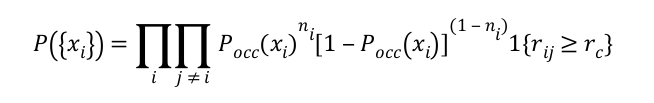

where $n_i$ is 1 if site $i$ is occupied, 0 otherwise.

- Then the feature vector $\mathbb{E}_{x\sim P}(F)$ is computed with a Metropolis Monte-Carlo**-inspired** sampling of the occupations. I'll come back to that.

- But another important question is: How is $r_c$ determined?
 - Initially set to 2 Å
 - "but some structures do not have any possible realizations in which all fractionally occupied
atoms are separated by more than 2 Å. In this case, if an acceptable structure is not drawn after 1,000 attempts, r c is decremented by 0.1 Å for the next 1,000 attempts, and so on, until a feasible structure is realized."

- Sampling features (/structures):
 - Initial structure is drawn from the above distribution
    - If any two fractionnaly occupied atoms are separated by $< r_c$, the structure is discarded
 - Generate a trial structure by choosing 2 atoms and/or vacancies uniformly at random and swapping them.
    - If this swap creates a *different* & *permissible* structure , it is accepted as the next MCMC step's starting structure with $P_{\text{accept}} = \min (P( \{ x_i \}_{\text{ new}}) /  P(\{ x_i \} _{\text{old}} ), 1)$. 
        - If new structure is unchanged, reject.
        - Example of invalid strucutre: swapping Li and Ge in Li 3.5 Ge 0.5 V 0.5 O 4 because then we have no site that either Li or Ge can occupy.
    - Add features to runnig average until convergence (feature change < 1% for last 100 step)


- More details at https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm and within the next figure




### In short, it's pretty straightforward: :D 

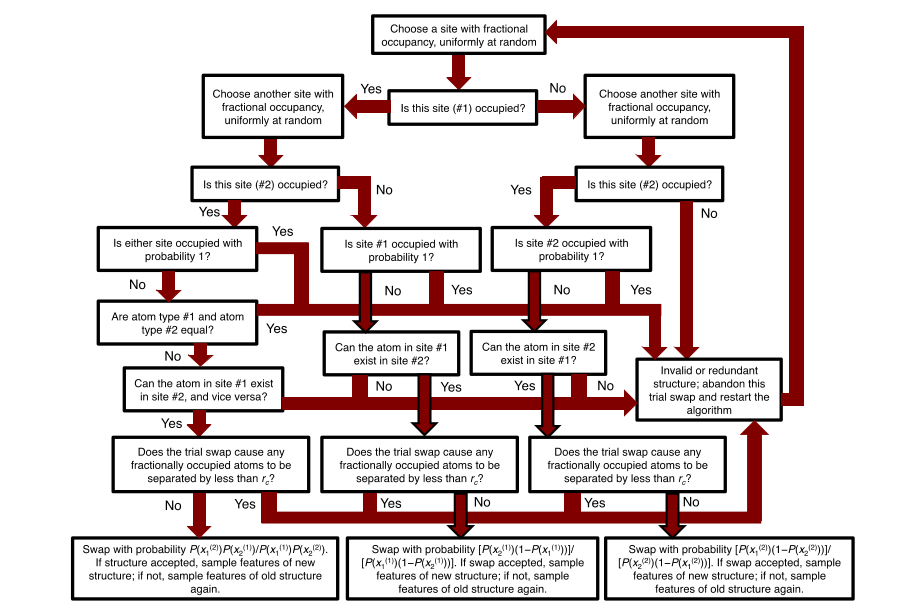

In [ ]:
from scipy.stats import bernoulli

In [ ]:
!pwd

/content


In [ ]:
ordered_count = 0
for i, row in df.iterrows():
    try:
        model = Sendek_Logistic_Model(row['formula'])
        if model.is_ordered and model.structure_source == 'external_cif':
            ordered_count += 1
    except Exception as e:
        print(e)
print(ordered_count)

Structure from ./data/LiLa(TiO3)2.cif is ordered. Using as is.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:751: UserWarning: No _symmetry_equiv_pos_as_xyz type key found. Defaulting to P1.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1159: UserWarning: No structure parsed for 1 structure in CIF. Section of CIF file below.
  warnings.warn("No structure parsed for %d structure in CIF. Section of CIF file below." % (i + 1))
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1160: UserWarning: data_global
_journal_date_recd_electronic   2015-07-20
_journal_date_to_coeditor   ?
_journal_date_from_coeditor   ?
_journal_date_accepted   2015-11-20
_journal_date_printers_first   ?
_journal_date_printers_final   ?
_journal_date_proofs_out   ?
_journal_date_proofs_in   ?
_journal_coeditor_name   ?
_journal_coeditor_code   KC5021SUP1
_journal_coeditor_notes   ""
_journal_paper_category   FA
_journal_techeditor_code   B152228
_iucr_compatibility_tag   ACTA95
_journal_techeditor_notes   ""
_journal_coden_AS

Structure from ./data/Li9.81Sn0.81P2.19S12.cif is disordered. Trying MP instead.
REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favicon.00

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Using preset mp-696128 for Li10Ge(PS6)2
Structure from ./data/Li10.35Si1.35P1.65S12.cif is disordered. Trying MP instead.
REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortc

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 2.0, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 2.0, 2.0, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


No structure find in MP!
'NoneType' object is not iterable
Structure from ./data/Li3Zn0.5GeO4.cif is disordered. Trying MP instead.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 2.0, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 2.0, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favicon.00f51d402f3d.png\' />\n  <link rel="stylesheet" href=\'/static/stylesheets/less/com

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Structure from ./data/Li2NH.cif is ordered. Using as is.
Structure from ./data/Li2S.cif is ordered. Using as is.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Structure from ./data/Li13.6Si2.8S1.2O16.cif is disordered. Trying MP instead.
REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Materials Project"\n      href=\'/static/opensearch.25669ffdaab0.xml\'>\n  <link rel="shortcut icon" href=\'/static/images/favicon.00f5

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([2.0, 1, 1, 1, 1, 1, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Using preset mp-849771 for Li14Ge2V2O16


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 1, 1, 2.0, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 1, 1, 2.0, 1, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Structure from ./data/Li15Ge3V2O16.cif is disordered. Trying MP instead.
No structure find in MP!
'NoneType' object is not iterable
Structure from ./data/Li14.8Ge3.4W0.6O16.cif is disordered. Trying MP instead.
REST query returned with error status code 404. Content: b'\n\n<!DOCTYPE html>\n<html>\n<head>\n  <title> Materials Project :: 404 </title>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n  <!--    <meta name="viewport" content="user-scalable = no">\n     -->\n  <!-- <meta name="viewport" content="width=device-width, initial-scale=1"> -->\n  <meta name="keywords" content="Materials Design, Materials Database, Materials Information, Materials Tools" />\n  <meta name="description" content="The Materials Project\'s mission is to accelerate the the discovery of new technological materials through advanced scientific computing and innovative design tools." />\n  <link rel="search"\n      type="application/opensearchdescription+xml"\n      title="Search Mat

/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 2.0, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 2.0, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Structure from ./data/Li5NI2.cif is disordered. Trying MP instead.
No structure find in MP!
'NoneType' object is not iterable
Structure from ./data/Li6BaLa2Ta2O12.cif is disordered. Trying MP instead.


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 2.0, 1, 1]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


No structure find in MP!
'NoneType' object is not iterable
Structure from ./data/Li6FeCl8.cif is ordered. Using as is.
Structure from ./data/Li6NBr3.cif is ordered. Using as is.
Could not find ./data/Li6SrLa2Ta2O12.cif. Trying MP.
No structure find in MP!
'NoneType' object is not iterable
Structure from ./data/Li7La3Zr2O12.cif is ordered. Using as is.
Structure from ./data/Li7P3S11.cif is ordered. Using as is.
Structure from ./data/LiAlH4.cif is ordered. Using as is.
Could not find ./data/LiAlSiO4.cif. Trying MP.
Using preset mp-6326 for LiAlSiO4


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1018: UserWarning: Some occupancies ([1, 1, 1, 1, 2]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some occupancies ([1, 1, 1, 1, 2]) sum to > 1! If they are within the occupancy_tolerance, they will be rescaled. The current occupancy_tolerance is set to: 2
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


Structure from ./data/LiBH4.cif is ordered. Using as is.
Structure from ./data/LiI.cif is ordered. Using as is.
Could not find ./data/LiNH2.cif. Trying MP.
Using preset mp-1079418 for LiNH2
Structure from ./data/α'-LiZr2P3O12.cif is ordered. Using as is.
26


Questions:
- it's not really a sum over all sites, since the indicator function being 0 sometimes would make every structure P = 0 
- I don't get the n_i being either 0 or 1. If it's a `site in structure`, they is it not always occupied if sum of probability is 1. 
 - Sometimes, sum < 1, but then that doesn't make it unoccupied (n_i=0), so is n_i always 1?

- It feels like the product should be $p_i^{n_i} (1 - p_j)^{n_j}$ with $n_i$ them *also* being $n_i \sim \text{Bernouilli} (p_i = \sum _{\text{specie_k at site i}}(p_{occ}(specie_k)) $

## Bravais Lattice
- Infinite array of discrete points generated by a set of discrete translation operations described in three dimensional space by: $\mathbf{R} = n_{1}\mathbf{a}_{1} + n_{2}\mathbf{a}_{2} + n_{3}\mathbf{a}_{3}$ with $n_i \in \mathbb{Z}$
- Two bravais lattice are equivalent if their symmetry groups are isomorphic
 - Therefore we can prove that there are finitely many bravais lattice in 2D (5) and 3D (14) (analogy: "modulo translational symmetry"). See [Wikipedia](https://en.wikipedia.org/wiki/Bravais_lattice#In_3_dimensions).

## Point Groups
- Symmetry operations that have a fixed point in common (e.g. inversion, reflection, rotation-reflection, some rotation)
- One can show that there are 32 isometric groups in 3D
- According to the crystallographic restriction theorem, a limited number of point groups is compatible with discrete translational symmetry: 27 from the 7 infinite series, and 5 of the 7 others. Together, these make up the 32 so-called crystallographic point groups. (cf. https://en.wikipedia.org/wiki/Point_groups_in_three_dimensions)

## Combining 14 bravrais lattice with 32 point groups --> 230 space groups
- Space groups is a powerful tool to see, e.g. if 2 crystals are topologically the same even if they don't have the same chemical composition

E.g.:


In [ ]:
from pymatgen.analysis.structure_matcher import StructureMatcher

#Let's create two structures which are the same topologically, but with different elements, and one lattice is larger.
s1 = Structure(pymatgen.core.Lattice.cubic(4.2), ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
s2 = Structure(pymatgen.core.Lattice.cubic(5), ["Rb", "F"], [[0, 0, 0], [0.5, 0.5, 0.5]])

m = StructureMatcher()
print(m.fit_anonymous(s1, s2)) #Returns a mapping which maps s1 and s2 onto each other. Strict element fitting is also available.

True


**Inversely, 2 crystals could have the same composition but not the same 3D organization (e.g. snowflakes vs ice cubes). This can affect the (macroscopic) chemical properties like conductivity.**

- This is especially relevant from an experimental standpoint, because (almost?) no synthesized crystal is perfect. They all have [crystallographic defect](https://en.wikipedia.org/wiki/Crystallographic_defect).

But it'd be almost always impossible to take the **unit cell** and just "zoom out" until we get a repeating pattern (called **supercell**) (see img)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/2d_supercell_example.svg/800px-2d_supercell_example.svg.png" height='300px'/>

- So in practice, we describe sites of a crystal as being partially occupied. (cf. examples below)

